In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from statannotations.Annotator import Annotator

In [4]:
from itertools import combinations

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [ ]:
#bash/command line on Barnacle2, combines R1 and R2 for searching
while read -r smp; do
    cat /ddn_scratch/.../sepsis_Gates/"${smp}"*.fasta > /ddn_scratch/.../sepsis_Gates/"${smp}"_concat.fasta
done < .../tube_list.txt

# Combine Individual Matches

In [ ]:
#use ipython on Barnacle2
import pandas as pd
import numpy as np
import glob, os

non_zero_files = []
li=[]

#make a list of all non-empty .txt files in current folder
for filepath in glob.glob(os.path.join("./individual_bsh/*.txt")):
    if os.path.getsize(filepath) > 0:
        non_zero_files.append(filepath)

for filename in non_zero_files:
    parts = filename.split("/")
    parts2 = parts[2]
    parts3 = parts2.split("_")
    extracted_id = parts3[0]
    diamond = pd.read_csv(filename, sep='\t', header=None)
    diamond.rename(columns={0:'qseqid', 1:'sseqid', 2:'pident', 3:'length', 4:'mismatch', 
                            5:'gapopen', 6:'qstart', 7:'qend', 8:'sstart', 9:'send', 
                            10:'evalue', 11:'bitscore', 12:'qlen', 13:'slen', 14:'stitle', 
                            15:'qtitle'}, inplace=True)
    diamond["identification"] = extracted_id
    li.append(diamond)
    
combo = pd.concat(li, sort=True)
combo.shape
combo.identification.nunique()
combo.head()
combo.to_csv("./individual_bsh/Sepsis_Gates_indv_bsh_blastx_matches.csv", index=False)

# Analysis - matches done by individual ID

In [7]:
metadata = pd.read_csv('../../data/metadata_combined.txt', 
                       sep='\t', index_col=0)
metadata.tail()

,age_enrollment_study,collection_date,collection_timestamp,country,description,dna_extracted,elevation,empo_1,empo_2,empo_3,...,hmo_Secretor,drink_water_safe,drink_water_safe_simplified,sample_type_binary,host_age_infant_cat,hmo_Secretor_str,sample_type2,delivery_bf-cat,SourceSink,30d_cat
sample_name,,,,,,,,,,,,,,,,,,,,,
14834.KATHARO.SEP.21.11H,not applicable,2023,2023,USA,KATHARO.SEP.21.11H,True,193,Control,Positive,Mock community,...,NaN,NaN,Treated,control positive,0,unknown,not applicable_control positive,not applicable_not applicable,not applicable,30 days of age or less
14834.donotuse.SEP.15.12E,not applicable,2023,2023,USA,not applicable,True,193,Control,Negative,sterile water blank,...,NaN,NaN,Treated,sample,0,unknown,not applicable_not a specimen,not applicable_not applicable,not applicable,30 days of age or less
14834.donotuse.SEP.7.8E,not applicable,2023,2023,USA,not applicable,True,193,Control,Negative,sterile water blank,...,NaN,NaN,Treated,sample,0,unknown,not applicable_not a specimen,not applicable_not applicable,not applicable,30 days of age or less
14834.infantstool.21days.41875,1,2021,2021,Bangladesh,infant stool,True,32,Host-associated,Host-associated (non-saline),Animal (non-saline),...,1,filter,Treated,sample,14,secretor,infant_feces,C-section_EBF,Sink,30 days of age or less
14834.maternalstool.21days.41875,1,2021,2021,Bangladesh,maternal stool,True,32,Host-associated,Host-associated (non-saline),Animal (non-saline),...,1,boil_filter,Treated,sample,14,secretor,adult_feces,C-section_not applicable,Source,30 days of age or less


In [8]:
metadata['drink_water_group'] = np.where(metadata['drink_water_safe']=='nothing', 'Untreated', 'Treated')

In [9]:
metadata.tube_id.dtype

dtype('O')

### bai

In [11]:
bai_indv = pd.read_csv('../../data/Microbiome/genes_interest/Sepsis_Gates_indv_bai_blastx_matches.csv')
bai_indv.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,qstart,qtitle,send,slen,sseqid,sstart,stitle
0,26.9,8.190000e-04,0,38514,16,5,68.8,122,151,A00953:675:HNL7YDSX5:2:1102:6189:12868/1,75,A00953:675:HNL7YDSX5:2:1102:6189:12868/1,173,530,tr|A0A1V5EAQ5|A0A1V5EAQ5_9BACT,158,tr|A0A1V5EAQ5|A0A1V5EAQ5_9BACT Bile acid-coenz...
1,45.1,3.050000e-10,0,38514,44,24,45.5,136,151,A00953:675:HNL7YDSX5:2:1105:4010:4492/1,5,A00953:675:HNL7YDSX5:2:1105:4010:4492/1,403,485,tr|A0A2R2WE76|A0A2R2WE76_9MICO,360,tr|A0A2R2WE76|A0A2R2WE76_9MICO Bile acid-coenz...
2,48.5,1.810000e-11,0,38514,32,11,65.6,100,151,A00953:675:HNL7YDSX5:2:1101:15456:35963/1,5,A00953:675:HNL7YDSX5:2:1101:15456:35963/1,194,639,sp|P19410|BAICD_CLOSV,163,sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desat...
3,63.2,1.030000e-16,0,38514,46,19,58.7,140,141,A00953:675:HNL7YDSX5:2:1109:5584:5588/1,3,A00953:675:HNL7YDSX5:2:1109:5584:5588/1,196,639,sp|P19410|BAICD_CLOSV,151,sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desat...
4,27.7,4.520000e-04,0,38514,17,7,58.8,79,151,A00953:675:HNL7YDSX5:2:1109:14733:10222/1,29,A00953:675:HNL7YDSX5:2:1109:14733:10222/1,334,495,tr|A0A7K0DZD9|A0A7K0DZD9_9NOCA,318,tr|A0A7K0DZD9|A0A7K0DZD9_9NOCA Bile acid-coenz...


In [12]:
bai_indv.length.describe()

count    2.400559e+06
mean     3.337254e+01
std      1.040054e+01
min      1.200000e+01
25%      2.500000e+01
50%      3.400000e+01
75%      4.200000e+01
max      6.400000e+01
Name: length, dtype: float64

In [13]:
bai_indv.columns

Index(['bitscore', 'evalue', 'gapopen', 'identification', 'length', 'mismatch',
       'pident', 'qend', 'qlen', 'qseqid', 'qstart', 'qtitle', 'send', 'slen',
       'sseqid', 'sstart', 'stitle'],
      dtype='object')

In [14]:
bai_indv.identification.nunique()

1594

In [15]:
bai_indv.identification.dtype

dtype('int64')

In [16]:
bai_indv.identification = bai_indv.identification.astype(str)

In [17]:
bai_ind_md = pd.merge(bai_indv, metadata[['host_subject_id', 'host_age_infant_cat', 'host_age_infant', 
                                          'mode_delivery', 'sample_type2', 'tube_id']], 
                       left_on='identification', right_on='tube_id')
bai_ind_md.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,...,slen,sseqid,sstart,stitle,host_subject_id,host_age_infant_cat,host_age_infant,mode_delivery,sample_type2,tube_id
0,26.9,8.190000e-04,0,38514,16,5,68.8,122,151,A00953:675:HNL7YDSX5:2:1102:6189:12868/1,...,530,tr|A0A1V5EAQ5|A0A1V5EAQ5_9BACT,158,tr|A0A1V5EAQ5|A0A1V5EAQ5_9BACT Bile acid-coenz...,102510,30,28.0,Vaginal,adult_feces,38514
1,45.1,3.050000e-10,0,38514,44,24,45.5,136,151,A00953:675:HNL7YDSX5:2:1105:4010:4492/1,...,485,tr|A0A2R2WE76|A0A2R2WE76_9MICO,360,tr|A0A2R2WE76|A0A2R2WE76_9MICO Bile acid-coenz...,102510,30,28.0,Vaginal,adult_feces,38514
2,48.5,1.810000e-11,0,38514,32,11,65.6,100,151,A00953:675:HNL7YDSX5:2:1101:15456:35963/1,...,639,sp|P19410|BAICD_CLOSV,163,sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desat...,102510,30,28.0,Vaginal,adult_feces,38514
3,63.2,1.030000e-16,0,38514,46,19,58.7,140,141,A00953:675:HNL7YDSX5:2:1109:5584:5588/1,...,639,sp|P19410|BAICD_CLOSV,151,sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desat...,102510,30,28.0,Vaginal,adult_feces,38514
4,27.7,4.520000e-04,0,38514,17,7,58.8,79,151,A00953:675:HNL7YDSX5:2:1109:14733:10222/1,...,495,tr|A0A7K0DZD9|A0A7K0DZD9_9NOCA,318,tr|A0A7K0DZD9|A0A7K0DZD9_9NOCA Bile acid-coenz...,102510,30,28.0,Vaginal,adult_feces,38514


In [18]:
bai_ind_md.shape

(2400559, 23)

In [19]:
bai_ind_md.length.describe()
#set match length to ~40

count    2.400559e+06
mean     3.337254e+01
std      1.040054e+01
min      1.200000e+01
25%      2.500000e+01
50%      3.400000e+01
75%      4.200000e+01
max      6.400000e+01
Name: length, dtype: float64

In [20]:
bai_ind_gtp = bai_ind_md[['stitle', 'sample_type2', 'pident']].copy()
bai_ind_gtp.head()

,stitle,sample_type2,pident
0,tr|A0A1V5EAQ5|A0A1V5EAQ5_9BACT Bile acid-coenz...,adult_feces,68.8
1,tr|A0A2R2WE76|A0A2R2WE76_9MICO Bile acid-coenz...,adult_feces,45.5
2,sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desat...,adult_feces,65.6
3,sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desat...,adult_feces,58.7
4,tr|A0A7K0DZD9|A0A7K0DZD9_9NOCA Bile acid-coenz...,adult_feces,58.8


In [21]:
bai_ind_gtp.groupby(['stitle', 'sample_type2']).count()

pident
stitle                                             sample_type2               
sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid deh... adult_breast milk       423
                                                   adult_feces           49869
                                                   adult_vaginal mucus     191
                                                   infant_feces          72950
                                                   infant_skin of arm   142281
...                                                                        ...
tr|Q0C610|Q0C610_HYPNA Bile acid-coenzyme A lig... adult_feces            3143
                                                   adult_vaginal mucus      10
                                                   infant_feces            952
                                                   infant_skin of arm     7405
                                                   infant_tongue           762

[327 rows x 1 columns]

In [22]:
primary_bai = bai_ind_md[['stitle','pident']].groupby(['stitle']).count()
primary_bai.sort_values(by='pident', ascending=False).head(20)

,pident
stitle,
tr|A5ZWV0|A5ZWV0_9FIRM Bile acid 7-dehydroxylase 1/3 OS=Blautia obeum ATCC 29174 OX=411459 GN=baiA PE=3 SV=1,461142
sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid dehydrogenase OS=Mediterraneibacter gnavus (strain ATCC 29149 / DSM 114966 / JCM 6515 / VPI C7-9) OX=411470 GN=baiA PE=1 SV=1,289380
tr|A0A975N4I8|A0A975N4I8_9PSEU Bile acid-coenzyme A ligase OS=Amycolatopsis sp. CA-230715 OX=2745196 GN=baiB PE=4 SV=1,233327
sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desaturase OS=Clostridium scindens (strain JCM 10418 / VPI 12708) OX=29347 GN=baiCD PE=1 SV=2,154859
tr|B6GEI2|B6GEI2_9ACTN Bile acid 7-dehydroxylase 1/3 OS=Collinsella stercoris DSM 13279 OX=445975 GN=baiA PE=3 SV=1,117103
sp|P19337|BAIA2_CLOSV 3alpha-hydroxy bile acid-CoA-ester 3-dehydrogenase 2 OS=Clostridium scindens (strain JCM 10418 / VPI 12708) OX=29347 GN=baiA2 PE=1 SV=1,92130
tr|A0A5B7UX90|A0A5B7UX90_9ACTN Bile acid-coenzyme A ligase OS=Streptomyces sp. YIM 121038 OX=2136401 GN=baiB PE=3 SV=1,91683
tr|A0A1Y2MQ53|A0A1Y2MQ53_PSEAH Bile acid-coenzyme A ligase OS=Pseudonocardia autotrophica OX=2074 GN=baiB_3 PE=3 SV=1,73491
tr|A0A1V5EAQ5|A0A1V5EAQ5_9BACT Bile acid-coenzyme A ligase OS=Syntrophaceae bacterium PtaU1.Bin231 OX=1811718 GN=baiB PE=3 SV=1,67775


In [25]:
primary_bai.sort_values(by='pident', ascending=False).to_csv('../../data/Microbiome/genes_interest/indv_bai_summary_top_counts.csv')

In [26]:
bai_plotting = bai_ind_md.copy()
bai_plotting2 = bai_plotting[bai_plotting['pident']>50].copy()
bai_plotting3 = bai_plotting2[bai_plotting2['evalue']<0.00001].copy()
bai_plotting4 = bai_plotting3[bai_plotting3['length']>40].copy()
bai_plotting5 = bai_plotting4[['stitle', 'host_age_infant_cat', 'host_age_infant', 'sample_type2', 
                               'mode_delivery', 'host_subject_id', 'pident']].copy()
bai_plotting6 = bai_plotting5.groupby(['stitle', 'host_age_infant_cat', 'host_age_infant', 'sample_type2', 'mode_delivery', 'host_subject_id']).count().reset_index()
bai_plotting6.rename(columns={'pident':'read_count_matches'}, inplace=True)
bai_plotting6.head()
# pident 50%, length match 40bp+

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches
0,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,0.0,infant_feces,Vaginal,102911,5
1,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,0.0,infant_skin of arm,Vaginal,100581,1
2,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,0.0,infant_skin of arm,Vaginal,101061,4
3,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,0.0,infant_skin of arm,Vaginal,102511,10
4,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,0.0,infant_skin of arm,Vaginal,102861,1


In [27]:
bai_plotting7 = bai_plotting6[['host_age_infant_cat', 'host_age_infant', 
                               'sample_type2', 'host_subject_id', 
                               'read_count_matches']].groupby(['host_age_infant_cat', 'host_age_infant', 
                                                               'sample_type2', 'host_subject_id']).sum().reset_index()
bai_plotting7.head()

,host_age_infant_cat,host_age_infant,sample_type2,host_subject_id,read_count_matches
0,0,0.0,adult_vaginal mucus,102910,1
1,0,0.0,adult_vaginal mucus,106810,2
2,0,0.0,adult_vaginal mucus,107270,1
3,0,0.0,adult_vaginal mucus,110900,2
4,0,0.0,infant_feces,100581,6


In [28]:
list(combinations(bai_plotting7.sample_type2.unique(), 2))

[('adult_vaginal mucus', 'infant_feces'),
 ('adult_vaginal mucus', 'infant_skin of arm'),
 ('adult_vaginal mucus', 'infant_tongue'),
 ('adult_vaginal mucus', 'adult_feces'),
 ('adult_vaginal mucus', 'adult_breast milk'),
 ('infant_feces', 'infant_skin of arm'),
 ('infant_feces', 'infant_tongue'),
 ('infant_feces', 'adult_feces'),
 ('infant_feces', 'adult_breast milk'),
 ('infant_skin of arm', 'infant_tongue'),
 ('infant_skin of arm', 'adult_feces'),
 ('infant_skin of arm', 'adult_breast milk'),
 ('infant_tongue', 'adult_feces'),
 ('infant_tongue', 'adult_breast milk'),
 ('adult_feces', 'adult_breast milk')]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

infant_skin of arm vs. adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.436e-84 U_stat=1.225e+05
infant_skin of arm vs. adult_breast milk: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.527e-41 U_stat=2.609e+04
infant_tongue vs. adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:5.659e-21 U_stat=4.012e+04
infant_skin of arm vs. adult_vaginal mucus: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:8.015e-16 U_stat=8.304e+03
infant_feces vs. adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.763e-03 U_stat=6.308e+04
infant_tongue vs. adult_breast milk: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_v

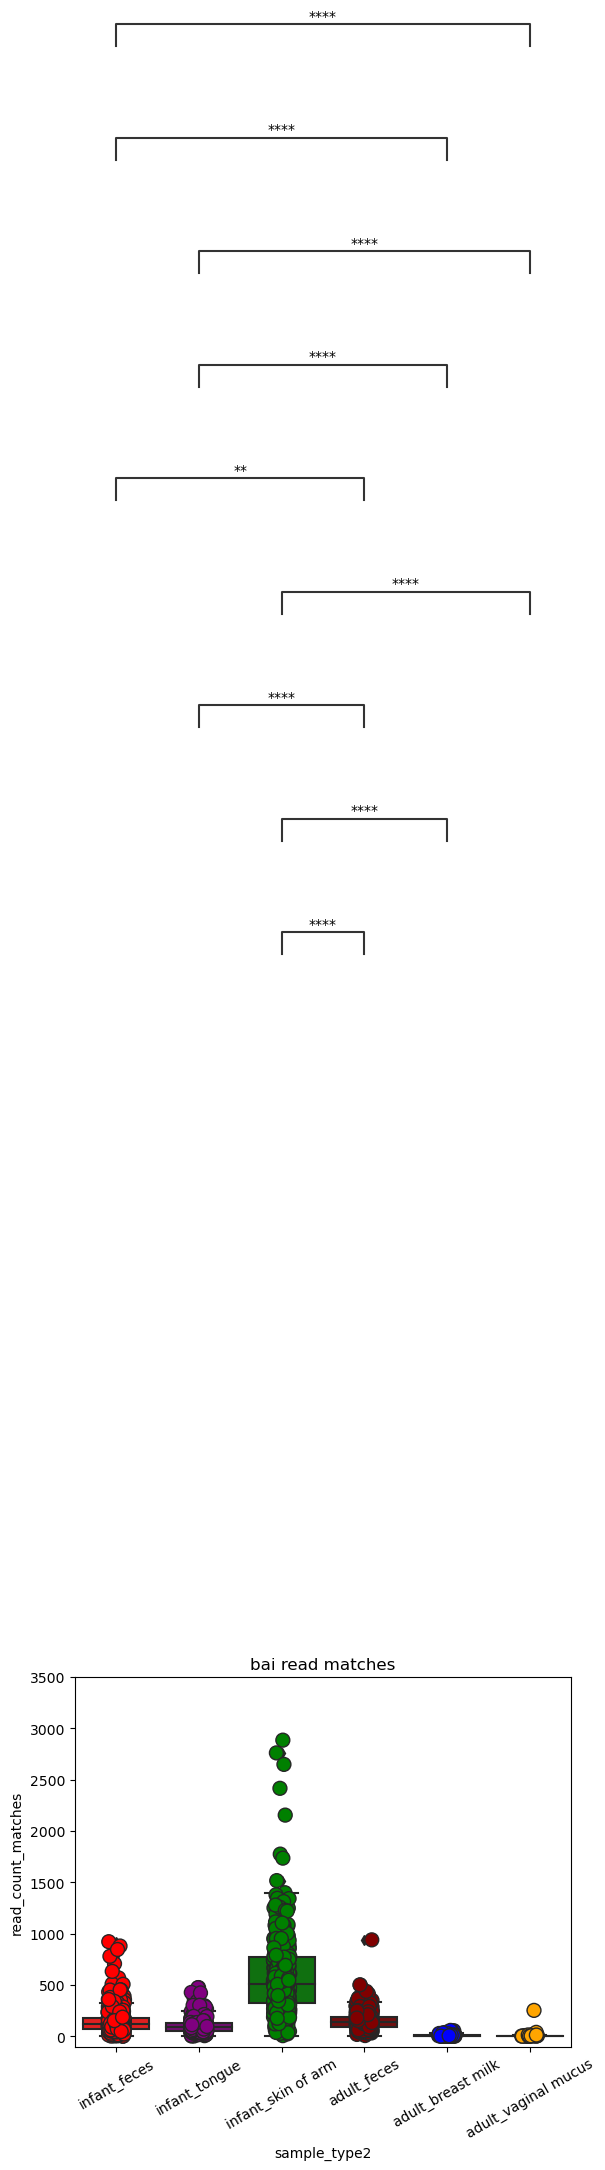

In [29]:
g = sns.boxplot(data=bai_plotting7, x='sample_type2', y='read_count_matches',
               order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'])
g = sns.stripplot(data=bai_plotting7, x='sample_type2', y='read_count_matches',
                 s=10, linewidth=1, 
               order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'])
pairs = [('adult_vaginal mucus', 'infant_feces'),
         ('adult_vaginal mucus', 'infant_skin of arm'),
         ('adult_vaginal mucus', 'infant_tongue'),
         ('infant_feces', 'adult_feces'),
         ('infant_feces', 'adult_breast milk'),
         ('infant_skin of arm', 'adult_feces'),
         ('infant_skin of arm', 'adult_breast milk'),
         ('infant_tongue', 'adult_feces'),
         ('infant_tongue', 'adult_breast milk'),]

annot = Annotator(g, pairs, data=bai_plotting7, x='sample_type2', y='read_count_matches',
               order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

plt.ylim(-100, 3500) #removes showing one 10000 outlier for infant skin
plt.title("bai read matches")
plt.xticks(rotation=30)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bai_sfilt_boxscatter.png', dpi=150, bbox_inches='tight')

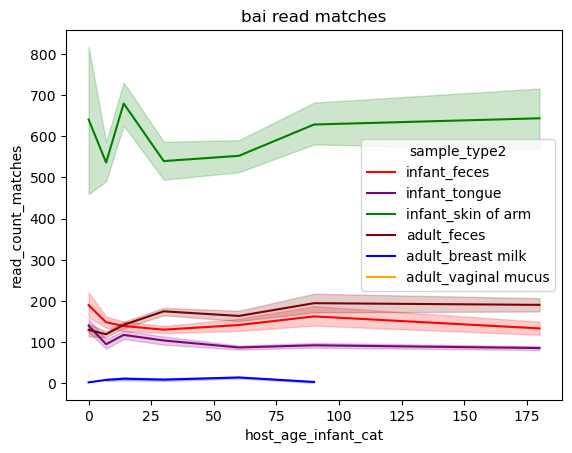

In [30]:
g = sns.lineplot(data=bai_plotting7, hue='sample_type2', x='host_age_infant_cat', y='read_count_matches',
               hue_order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'], ci=68)
plt.title("bai read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bai_sfilt_lineplot.png', dpi=150, bbox_inches='tight')

In [31]:
primary_bai = bai_ind_md[['stitle','pident']].groupby(['stitle']).count()
primary_bai2 = primary_bai.sort_values(by='pident', ascending=False)
primary_bai2

,pident
stitle,
tr|A5ZWV0|A5ZWV0_9FIRM Bile acid 7-dehydroxylase 1/3 OS=Blautia obeum ATCC 29174 OX=411459 GN=baiA PE=3 SV=1,461142
sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid dehydrogenase OS=Mediterraneibacter gnavus (strain ATCC 29149 / DSM 114966 / JCM 6515 / VPI C7-9) OX=411470 GN=baiA PE=1 SV=1,289380
tr|A0A975N4I8|A0A975N4I8_9PSEU Bile acid-coenzyme A ligase OS=Amycolatopsis sp. CA-230715 OX=2745196 GN=baiB PE=4 SV=1,233327
sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desaturase OS=Clostridium scindens (strain JCM 10418 / VPI 12708) OX=29347 GN=baiCD PE=1 SV=2,154859
tr|B6GEI2|B6GEI2_9ACTN Bile acid 7-dehydroxylase 1/3 OS=Collinsella stercoris DSM 13279 OX=445975 GN=baiA PE=3 SV=1,117103
sp|P19337|BAIA2_CLOSV 3alpha-hydroxy bile acid-CoA-ester 3-dehydrogenase 2 OS=Clostridium scindens (strain JCM 10418 / VPI 12708) OX=29347 GN=baiA2 PE=1 SV=1,92130
tr|A0A5B7UX90|A0A5B7UX90_9ACTN Bile acid-coenzyme A ligase OS=Streptomyces sp. YIM 121038 OX=2136401 GN=baiB PE=3 SV=1,91683
tr|A0A1Y2MQ53|A0A1Y2MQ53_PSEAH Bile acid-coenzyme A ligase OS=Pseudonocardia autotrophica OX=2074 GN=baiB_3 PE=3 SV=1,73491
tr|A0A1V5EAQ5|A0A1V5EAQ5_9BACT Bile acid-coenzyme A ligase OS=Syntrophaceae bacterium PtaU1.Bin231 OX=1811718 GN=baiB PE=3 SV=1,67775


In [32]:
primary_bai2.head(2).index.tolist()

['tr|A5ZWV0|A5ZWV0_9FIRM Bile acid 7-dehydroxylase 1/3 OS=Blautia obeum ATCC 29174 OX=411459 GN=baiA PE=3 SV=1',
 'sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid dehydrogenase OS=Mediterraneibacter gnavus (strain ATCC 29149 / DSM 114966 / JCM 6515 / VPI C7-9) OX=411470 GN=baiA PE=1 SV=1']

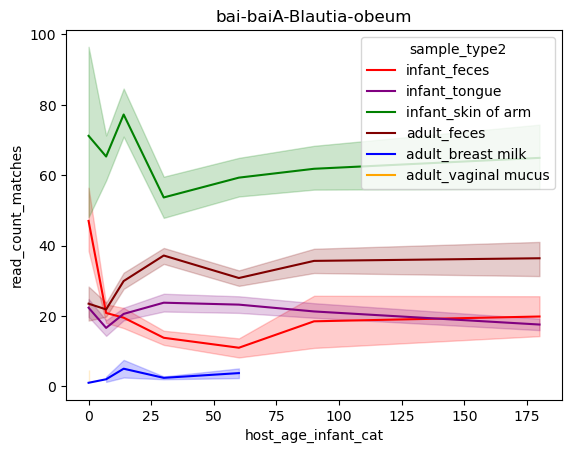

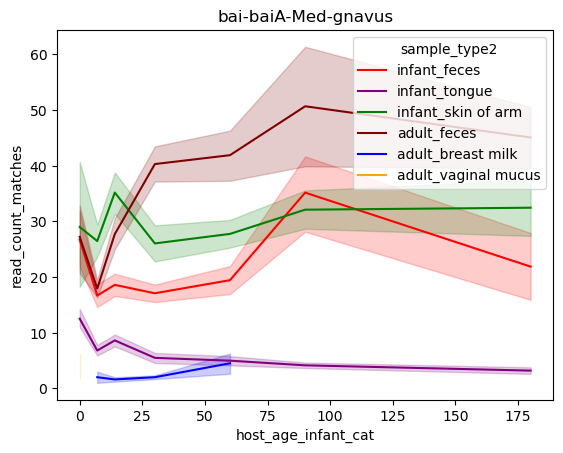

In [33]:
for x in primary_bai2[:2].index.values:
    g = sns.lineplot(data=bai_plotting6[bai_plotting6['stitle']==x], 
                 hue='sample_type2', x='host_age_infant_cat', y='read_count_matches',
               hue_order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'], ci=68)
    plt.rcParams['svg.fonttype'] = 'none'
    if x == 'sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid dehydrogenase OS=Mediterraneibacter gnavus (strain ATCC 29149 / DSM 114966 / JCM 6515 / VPI C7-9) OX=411470 GN=baiA PE=1 SV=1':
        y='bai-baiA-Med-gnavus'
    elif x == 'tr|A5ZWV0|A5ZWV0_9FIRM Bile acid 7-dehydroxylase 1/3 OS=Blautia obeum ATCC 29174 OX=411459 GN=baiA PE=3 SV=1':
        y='bai-baiA-Blautia-obeum'
    plt.title(y)
    #plt.savefig('../figures/bai_sfilt_%s_lineplot.png' %y, dpi=150, bbox_inches='tight')
    plt.show()

### fecal samples only

In [34]:
bai_imfeces = bai_plotting6[bai_plotting6['sample_type2'].isin(['infant_feces', 'adult_feces'])].copy()
bai_imfeces.head()

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches
0,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,0.0,infant_feces,Vaginal,102911,5
19,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,C-section,105711,1
20,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,C-section,111121,3
21,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,Vaginal,101631,5
22,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,Vaginal,102511,5


In [35]:
primary_fbai = bai_imfeces[['stitle','host_subject_id']].groupby(['stitle']).count()
primary_fbai.rename(columns={'host_subject_id': 'counts'}, inplace=True)
primary_fbai2 = primary_fbai.sort_values(by='counts', ascending=False)
primary_fbai2.head(10)

,counts
stitle,
sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid dehydrogenase OS=Mediterraneibacter gnavus (strain ATCC 29149 / DSM 114966 / JCM 6515 / VPI C7-9) OX=411470 GN=baiA PE=1 SV=1,718
tr|A0A1Y2MQ53|A0A1Y2MQ53_PSEAH Bile acid-coenzyme A ligase OS=Pseudonocardia autotrophica OX=2074 GN=baiB_3 PE=3 SV=1,696
sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desaturase OS=Clostridium scindens (strain JCM 10418 / VPI 12708) OX=29347 GN=baiCD PE=1 SV=2,682
tr|A5ZWV0|A5ZWV0_9FIRM Bile acid 7-dehydroxylase 1/3 OS=Blautia obeum ATCC 29174 OX=411459 GN=baiA PE=3 SV=1,673
tr|A0A1V5EAQ5|A0A1V5EAQ5_9BACT Bile acid-coenzyme A ligase OS=Syntrophaceae bacterium PtaU1.Bin231 OX=1811718 GN=baiB PE=3 SV=1,593
tr|A0A7K0E042|A0A7K0E042_9NOCA Bile acid-coenzyme A ligase OS=Nocardia aurantia OX=2585199 GN=baiB_4 PE=3 SV=1,499
tr|A0A2S8BLV1|A0A2S8BLV1_9MYCO Bile acid-coenzyme A ligase OS=Mycobacterium talmoniae OX=1858794 GN=baiB_1 PE=3 SV=1,423
tr|B6GEI2|B6GEI2_9ACTN Bile acid 7-dehydroxylase 1/3 OS=Collinsella stercoris DSM 13279 OX=445975 GN=baiA PE=3 SV=1,333
sp|P19337|BAIA2_CLOSV 3alpha-hydroxy bile acid-CoA-ester 3-dehydrogenase 2 OS=Clostridium scindens (strain JCM 10418 / VPI 12708) OX=29347 GN=baiA2 PE=1 SV=1,295


In [36]:
bai_imfeces2 = bai_imfeces[['host_age_infant_cat', 'sample_type2', 'host_subject_id',
                               'read_count_matches']].groupby(['host_age_infant_cat', 'host_subject_id',
                                                              'sample_type2']).sum().reset_index()
bai_imfeces2.head()

,host_age_infant_cat,host_subject_id,sample_type2,read_count_matches
0,0,100581,infant_feces,6
1,0,100771,infant_feces,182
2,0,101060,adult_feces,416
3,0,101061,infant_feces,202
4,0,101630,adult_feces,130


NameError: name 'bai_ifeces2' is not defined

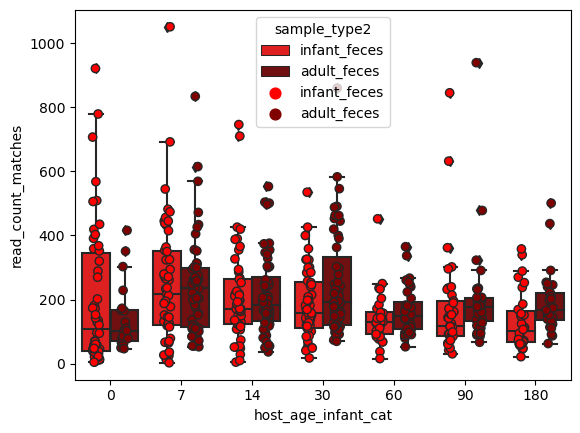

In [37]:
g = sns.boxplot(data=bai_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'])
g = sns.stripplot(data=bai_imfeces2, x='host_age_infant_cat', y='read_count_matches',
                 s=6, linewidth=1, hue='sample_type2', 
               hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'], dodge=True)
pairs = [((tp, 'infant_feces'),(tp, 'adult_feces')) for tp in bai_ifeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=bai_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

plt.title("bai read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bai_sfilt_boxscatter.png', dpi=150, bbox_inches='tight')

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_infant_feces vs. 7_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:9.870e-01 U_stat=1.354e+03
0_infant_feces vs. 0_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:7.402e-01 U_stat=4.740e+02
14_infant_feces vs. 14_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:7.658e-01 U_stat=1.179e+03
30_infant_feces vs. 30_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:7.031e-02 U_stat=9.650e+02
60_infant_feces vs. 60_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.611e-01 U_stat=4.180e+02
90_infant_feces vs. 90_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.139

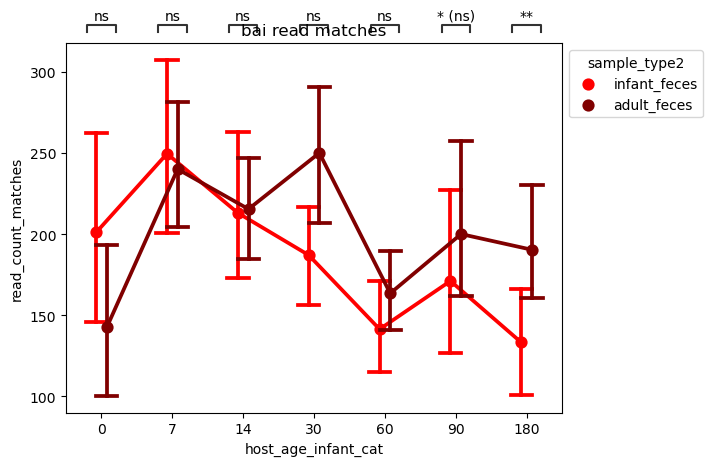

In [46]:
g = sns.pointplot(data=bai_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'], capsize=.3, dodge=0.15,)
                 #err_kws={'alpha': 0.5},) doesn't work

pairs = [((tp, 'infant_feces'),(tp, 'adult_feces')) for tp in bai_imfeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=bai_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("bai read matches")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/bai_feces_pointplot.png', dpi=150, bbox_inches='tight')

In [39]:
primary_fbai2.head(5).index.tolist()

['sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid dehydrogenase OS=Mediterraneibacter gnavus (strain ATCC 29149 / DSM 114966 / JCM 6515 / VPI C7-9) OX=411470 GN=baiA PE=1 SV=1',
 'tr|A0A1Y2MQ53|A0A1Y2MQ53_PSEAH Bile acid-coenzyme A ligase OS=Pseudonocardia autotrophica OX=2074 GN=baiB_3 PE=3 SV=1',
 'sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desaturase OS=Clostridium scindens (strain JCM 10418 / VPI 12708) OX=29347 GN=baiCD PE=1 SV=2',
 'tr|A5ZWV0|A5ZWV0_9FIRM Bile acid 7-dehydroxylase 1/3 OS=Blautia obeum ATCC 29174 OX=411459 GN=baiA PE=3 SV=1',
 'tr|A0A1V5EAQ5|A0A1V5EAQ5_9BACT Bile acid-coenzyme A ligase OS=Syntrophaceae bacterium PtaU1.Bin231 OX=1811718 GN=baiB PE=3 SV=1']

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_infant_feces vs. 7_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:6.427e-04 U_stat=4.646e+03
0_infant_feces vs. 0_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:9.581e-01 U_stat=4.330e+02
14_infant_feces vs. 14_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:7.165e-03 U_stat=1.650e+03
30_infant_feces vs. 30_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:4.724e-08 U_stat=8.510e+02
60_infant_feces vs. 60_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:8.029e-07 U_stat=1.080e+02
90_infant_feces vs. 90_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.479

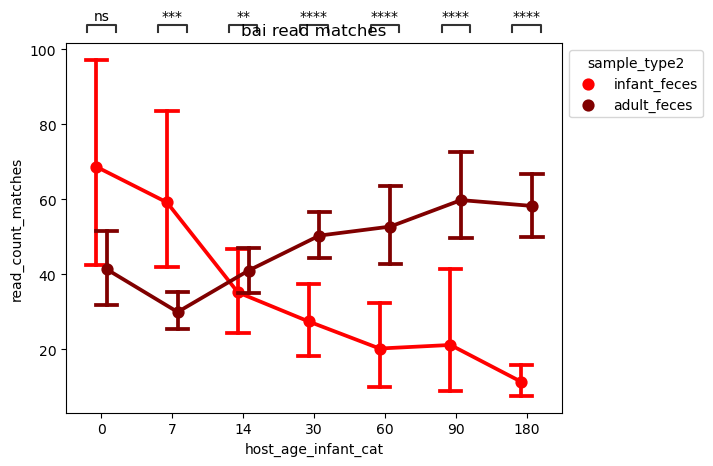

In [40]:
bact_interest = 'sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desaturase OS=Clostridium scindens (strain JCM 10418 / VPI 12708) OX=29347 GN=baiCD PE=1 SV=2'
bi_short='baiCD_Cscindens'

bai_imfeces_Cs = bai_imfeces[bai_imfeces['stitle']==bact_interest].copy()

g = sns.pointplot(data=bai_imfeces_Cs, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'], capsize=.3, dodge=0.15,)
                 #err_kws={'alpha': 0.5},) doesn't work

pairs = [((tp, 'infant_feces'),(tp, 'adult_feces')) for tp in bai_imfeces_Cs['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=bai_imfeces_Cs, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("bai read matches")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/bai_feces_pointplot_%s.svg' % bi_short, dpi=150, bbox_inches='tight')

### infant only

In [41]:
bai_ifeces = bai_plotting6[bai_plotting6['sample_type2'].isin(['infant_feces'])].copy()
bai_ifeces.head()

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches
0,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,0.0,infant_feces,Vaginal,102911,5
19,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,C-section,105711,1
20,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,C-section,111121,3
21,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,Vaginal,101631,5
22,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,Vaginal,102511,5


In [42]:
primary_fbai = bai_ifeces[['stitle', 'mode_delivery', 'host_subject_id']].groupby(['stitle', 'mode_delivery']).count()
primary_fbai.rename(columns={'host_subject_id': 'counts'}, inplace=True)
primary_fbai2 = primary_fbai.sort_values(by='counts', ascending=False)
primary_fbai2.head(10)
#not really enough for each indvidual, do as a whole

counts
stitle                                             mode_delivery        
tr|A0A1Y2MQ53|A0A1Y2MQ53_PSEAH Bile acid-coenzy... Vaginal           181
                                                   C-section         178
sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid deh... Vaginal           175
                                                   C-section         170
sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desatu... Vaginal           167
tr|A5ZWV0|A5ZWV0_9FIRM Bile acid 7-dehydroxylas... Vaginal           166
tr|A0A1V5EAQ5|A0A1V5EAQ5_9BACT Bile acid-coenzy... Vaginal           146
sp|P19410|BAICD_CLOSV 3-oxocholoyl-CoA 4-desatu... C-section         134
tr|A5ZWV0|A5ZWV0_9FIRM Bile acid 7-dehydroxylas... C-section         132
tr|A0A7K0E042|A0A7K0E042_9NOCA Bile acid-coenzy... Vaginal           132

In [43]:
bai_ifeces2 = bai_ifeces[['host_age_infant_cat', 'sample_type2', 'host_subject_id', 'mode_delivery',
                               'read_count_matches']].groupby(['host_age_infant_cat', 'mode_delivery', 'host_subject_id',
                                                              'sample_type2']).sum().reset_index()
bai_ifeces2.head()

,host_age_infant_cat,mode_delivery,host_subject_id,sample_type2,read_count_matches
0,0,C-section,100771,infant_feces,182
1,0,C-section,102681,infant_feces,46
2,0,C-section,103141,infant_feces,359
3,0,C-section,104551,infant_feces,135
4,0,C-section,105711,infant_feces,39


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_Vaginal vs. 7_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:5.150e-01 U_stat=2.890e+02
0_Vaginal vs. 0_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.772e-02 (ns) U_stat=2.045e+02
14_Vaginal vs. 14_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.448e-01 U_stat=3.450e+02
30_Vaginal vs. 30_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:7.259e-01 U_stat=3.055e+02
60_Vaginal vs. 60_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:6.720e-01 U_stat=9.750e+01
90_Vaginal vs. 90_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.482e-01 U_stat=2.095e+02
180_Vaginal vs.

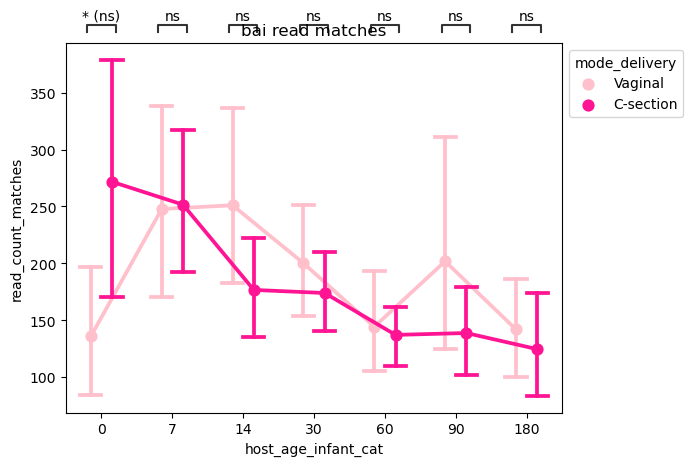

In [44]:
g = sns.pointplot(data=bai_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'],
                palette=['pink', 'deeppink'], capsize=.3, dodge=0.3,)

pairs = [((tp, 'Vaginal'),(tp, 'C-section')) for tp in bai_ifeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=bai_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("bai read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bai_ifeces_pointplot_dmode.png', dpi=150, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_Vaginal vs. 7_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:5.150e-01 U_stat=2.890e+02
0_Vaginal vs. 0_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:3.772e-02 U_stat=2.045e+02
14_Vaginal vs. 14_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:1.448e-01 U_stat=3.450e+02
30_Vaginal vs. 30_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:7.259e-01 U_stat=3.055e+02
60_Vaginal vs. 60_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:6.720e-01 U_stat=9.750e+01
90_Vaginal vs. 90_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:2.482e-01 U_stat=2.095e+02
180_Vaginal vs. 180_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:4.553e-01 U_stat=1.310e+02


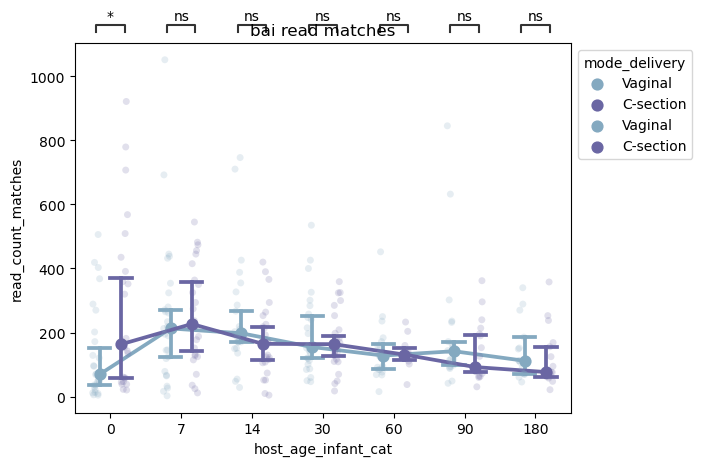

In [45]:
palette1 = ['pink', 'deeppink']
palette2 = ['#84A9C0', '#6A66A3']

g = sns.pointplot(data=bai_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'], estimator=np.median,
                palette=palette2, capsize=.3, dodge=0.3, error_bar=('pi', 50))

g = sns.stripplot(data=bai_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'], 
                palette=palette2, dodge=0.2, alpha=0.2)

pairs = [((tp, 'Vaginal'),(tp, 'C-section')) for tp in bai_ifeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=bai_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'])
annot.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("bai read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bai_ifeces_pointplot_dmode.svg', dpi=150, bbox_inches='tight')

In [49]:
data = bai_ifeces2.copy()
data.dropna(subset=['read_count_matches'], inplace=True) #need to drop nans
model = smf.mixedlm("read_count_matches~host_age_infant_cat*mode_delivery", data, 
                        groups="host_subject_id", re_formula="1")
res = model.fit(method=['lbfgs',  'powell', 'cg'])
print("LME for bai read count matches")
print(res.summary())

LME for bai read count matches
                           Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          read_count_matches
No. Observations:          293              Method:                      REML              
No. Groups:                55               Scale:                       23238.8603        
Min. group size:           4                Log-Likelihood:              -1893.1610        
Max. group size:           7                Converged:                   Yes               
Mean group size:           5.3                                                             
-------------------------------------------------------------------------------------------
                                              Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------------------------------------------
Intercept                                     224.162   19.295 11.618 0.000 

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


In [50]:
bai_ifeces_short = bai_ifeces[bai_ifeces['host_age_infant']<46].copy()

conditions = [
    (bai_ifeces_short['host_age_infant'] >= 0) & (bai_ifeces_short['host_age_infant'] <= 7),   # 0 to 7 (exclusive 7)
    (bai_ifeces_short['host_age_infant'] >= 14) & (bai_ifeces_short['host_age_infant'] <= 28), # 14 to 28 (exclusive 28)
    (bai_ifeces_short['host_age_infant'] >= 30) & (bai_ifeces_short['host_age_infant'] <= 45) # 30 to 45 (inclusive 45)
]
choices = ['Category 0-7', 'Category 14-28', 'Category 30-45']

bai_ifeces_short['metab_time_cat'] = np.select(conditions, choices, default='other')
bai_ifeces_short.head()

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches,metab_time_cat
0,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,0.0,infant_feces,Vaginal,102911,5,Category 0-7
19,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,C-section,105711,1,Category 0-7
20,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,C-section,111121,3,Category 0-7
21,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,Vaginal,101631,5,Category 0-7
22,sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid de...,0,1.0,infant_feces,Vaginal,102511,5,Category 0-7


In [51]:
bai_ifeces_short2 = bai_ifeces_short[['metab_time_cat', 'host_subject_id', 'mode_delivery',
                               'read_count_matches']].groupby(['metab_time_cat', 'mode_delivery', 'host_subject_id',]).sum().reset_index()
bai_ifeces_short2.head()

,metab_time_cat,mode_delivery,host_subject_id,read_count_matches
0,Category 0-7,C-section,100771,207
1,Category 0-7,C-section,102681,58
2,Category 0-7,C-section,103141,446
3,Category 0-7,C-section,103741,13
4,Category 0-7,C-section,103951,224


Category 14-28_C-section vs. Category 14-28_Vaginal: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.669e-01 U_stat=2.440e+02
Category 0-7_C-section vs. Category 0-7_Vaginal: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:6.404e-01 U_stat=3.920e+02
Category 30-45_C-section vs. Category 30-45_Vaginal: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:4.093e-01 U_stat=1.275e+02


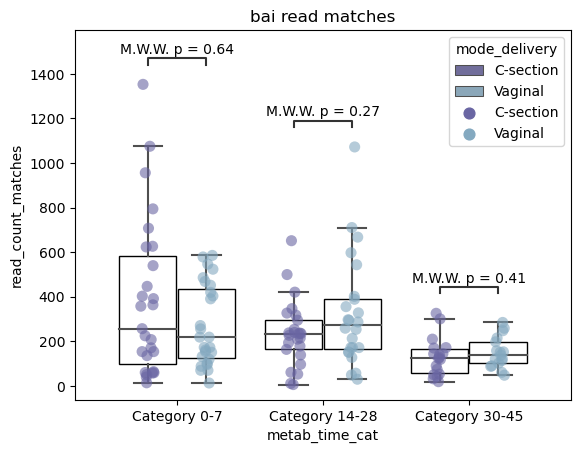

In [52]:
df = bai_ifeces_short2[~(bai_ifeces_short2['metab_time_cat']=='other')].copy()
pale2e = ['#6A66A3','#84A9C0']
g = sns.boxplot(data=df,
            x='metab_time_cat', y='read_count_matches', hue='mode_delivery',
            hue_order=['C-section', 'Vaginal'],
            palette=pale2e, fliersize=0, boxprops=dict(facecolor='none', edgecolor='black', linewidth=1))
g = sns.stripplot(data=df,
            x='metab_time_cat', y='read_count_matches', hue='mode_delivery',
              hue_order=['C-section', 'Vaginal'],
            palette=pale2e, alpha=0.6, dodge=True, s=8)

pairs = [((tp, 'Vaginal'),(tp, 'C-section')) for tp in ['Category 0-7', 'Category 14-28', 'Category 30-45']]
annot = Annotator(g, pairs, data=df,
            x='metab_time_cat', y='read_count_matches', hue='mode_delivery',
            hue_order=['C-section', 'Vaginal'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='simple', loc='inside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

plt.title("bai read matches")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/bai_early_ifeces_boxplot_dmode.svg', dpi=150, bbox_inches='tight')

### hsdh

In [54]:
hsdh_indv = pd.read_csv('../../data/Microbiome/genes_interest/Sepsis_Gates_indv_hsdh_blastx_matches.csv')
hsdh_indv.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,qstart,qtitle,send,slen,sseqid,sstart,stitle
0,44.3,6.940000e-10,0,38416,41,20,51.2,5,151,A00953:675:HNL7YDSX5:2:1101:7591:7153/1,127,A00953:675:HNL7YDSX5:2:1101:7591:7153/1,41,257,tr|A0A2S6RIQ9|A0A2S6RIQ9_9PROT,1,tr|A0A2S6RIQ9|A0A2S6RIQ9_9PROT 7-alpha-hydroxy...
1,37.4,1.980000e-07,0,38416,29,14,51.7,63,151,A00953:675:HNL7YDSX5:2:1101:26648:35931/1,149,A00953:675:HNL7YDSX5:2:1101:26648:35931/1,254,254,tr|A0A245ZVH2|A0A245ZVH2_9SPHN,226,tr|A0A245ZVH2|A0A245ZVH2_9SPHN 7-alpha-hydroxy...
2,100.0,9.520000e-31,0,38416,50,4,92.0,1,151,A00953:675:HNL7YDSX5:2:1102:22851:2080/1,150,A00953:675:HNL7YDSX5:2:1102:22851:2080/1,68,264,tr|A0A4U9D1Y3|A0A4U9D1Y3_RAOTE,19,tr|A0A4U9D1Y3|A0A4U9D1Y3_RAOTE 7-alpha-hydroxy...
3,28.5,3.070000e-04,0,38416,22,10,54.5,69,151,A00953:675:HNL7YDSX5:2:1102:24442:2581/1,4,A00953:675:HNL7YDSX5:2:1102:24442:2581/1,512,678,tr|A0A1X7BM48|A0A1X7BM48_9RHOB,491,tr|A0A1X7BM48|A0A1X7BM48_9RHOB 7-alpha-hydroxy...
4,32.7,8.780000e-06,0,38416,35,18,48.6,45,151,A00953:675:HNL7YDSX5:2:1101:29568:17127/1,149,A00953:675:HNL7YDSX5:2:1101:29568:17127/1,45,261,sp|C8WJW0|3BHD1_EGGLE,11,sp|C8WJW0|3BHD1_EGGLE 3beta-hydroxysteroid deh...


In [55]:
hsdh_indv.length.describe()

count    6.037090e+06
mean     3.418026e+01
std      9.275555e+00
min      1.100000e+01
25%      2.700000e+01
50%      3.400000e+01
75%      4.100000e+01
max      6.400000e+01
Name: length, dtype: float64

In [56]:
hsdh_indv.columns

Index(['bitscore', 'evalue', 'gapopen', 'identification', 'length', 'mismatch',
       'pident', 'qend', 'qlen', 'qseqid', 'qstart', 'qtitle', 'send', 'slen',
       'sseqid', 'sstart', 'stitle'],
      dtype='object')

In [57]:
hsdh_indv.identification.nunique()

1598

In [58]:
hsdh_indv.identification.dtype

dtype('int64')

In [59]:
hsdh_indv.identification = hsdh_indv.identification.astype(str)

In [60]:
hsdh_ind_md = pd.merge(hsdh_indv, metadata[['host_subject_id', 'host_age_infant_cat', 'host_age_infant', 'mode_delivery', 'sample_type2', 'tube_id']], 
                       left_on='identification', right_on='tube_id')
hsdh_ind_md.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,...,slen,sseqid,sstart,stitle,host_subject_id,host_age_infant_cat,host_age_infant,mode_delivery,sample_type2,tube_id
0,44.3,6.940000e-10,0,38416,41,20,51.2,5,151,A00953:675:HNL7YDSX5:2:1101:7591:7153/1,...,257,tr|A0A2S6RIQ9|A0A2S6RIQ9_9PROT,1,tr|A0A2S6RIQ9|A0A2S6RIQ9_9PROT 7-alpha-hydroxy...,102541,60,60.0,Vaginal,infant_feces,38416
1,37.4,1.980000e-07,0,38416,29,14,51.7,63,151,A00953:675:HNL7YDSX5:2:1101:26648:35931/1,...,254,tr|A0A245ZVH2|A0A245ZVH2_9SPHN,226,tr|A0A245ZVH2|A0A245ZVH2_9SPHN 7-alpha-hydroxy...,102541,60,60.0,Vaginal,infant_feces,38416
2,100.0,9.520000e-31,0,38416,50,4,92.0,1,151,A00953:675:HNL7YDSX5:2:1102:22851:2080/1,...,264,tr|A0A4U9D1Y3|A0A4U9D1Y3_RAOTE,19,tr|A0A4U9D1Y3|A0A4U9D1Y3_RAOTE 7-alpha-hydroxy...,102541,60,60.0,Vaginal,infant_feces,38416
3,28.5,3.070000e-04,0,38416,22,10,54.5,69,151,A00953:675:HNL7YDSX5:2:1102:24442:2581/1,...,678,tr|A0A1X7BM48|A0A1X7BM48_9RHOB,491,tr|A0A1X7BM48|A0A1X7BM48_9RHOB 7-alpha-hydroxy...,102541,60,60.0,Vaginal,infant_feces,38416
4,32.7,8.780000e-06,0,38416,35,18,48.6,45,151,A00953:675:HNL7YDSX5:2:1101:29568:17127/1,...,261,sp|C8WJW0|3BHD1_EGGLE,11,sp|C8WJW0|3BHD1_EGGLE 3beta-hydroxysteroid deh...,102541,60,60.0,Vaginal,infant_feces,38416


In [61]:
hsdh_ind_md.shape

(6037090, 23)

In [62]:
hsdh_ind_md.length.describe()
#set match length to ~40

count    6.037090e+06
mean     3.418026e+01
std      9.275555e+00
min      1.100000e+01
25%      2.700000e+01
50%      3.400000e+01
75%      4.100000e+01
max      6.400000e+01
Name: length, dtype: float64

In [63]:
hsdh_ind_gtp = hsdh_ind_md[['stitle', 'sample_type2', 'pident']].copy()
hsdh_ind_gtp.head()

,stitle,sample_type2,pident
0,tr|A0A2S6RIQ9|A0A2S6RIQ9_9PROT 7-alpha-hydroxy...,infant_feces,51.2
1,tr|A0A245ZVH2|A0A245ZVH2_9SPHN 7-alpha-hydroxy...,infant_feces,51.7
2,tr|A0A4U9D1Y3|A0A4U9D1Y3_RAOTE 7-alpha-hydroxy...,infant_feces,92.0
3,tr|A0A1X7BM48|A0A1X7BM48_9RHOB 7-alpha-hydroxy...,infant_feces,54.5
4,sp|C8WJW0|3BHD1_EGGLE 3beta-hydroxysteroid deh...,infant_feces,48.6


In [64]:
hsdh_ind_gtp.groupby(['stitle', 'sample_type2']).count()

pident
stitle                                             sample_type2               
sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid dehy... adult_breast milk       106
                                                   adult_feces           19076
                                                   adult_vaginal mucus      60
                                                   infant_feces          30164
                                                   infant_skin of arm    48857
...                                                                        ...
tr|S5U393|S5U393_COMTE 7-alpha-hydroxysteroid d... adult_feces            8433
                                                   adult_vaginal mucus      63
                                                   infant_feces          10337
                                                   infant_skin of arm    55284
                                                   infant_tongue         11553

[752 rows x 1 columns]

In [65]:
primary_hsdh = hsdh_ind_md[['stitle','pident']].groupby(['stitle']).count()
primary_hsdh.sort_values(by='pident', ascending=False).head(20)

,pident
stitle,
sp|C8WJW0|3BHD1_EGGLE 3beta-hydroxysteroid dehydrogenase 1 OS=Eggerthella lenta (strain ATCC 25559 / DSM 2243 / CCUG 17323 / JCM 9979 / KCTC 3265 / NCTC 11813 / VPI 0255 / 1899 B) OX=479437 GN=Elen_0198 PE=1 SV=1,291583
tr|A0A3P6LME2|A0A3P6LME2_SHIDY 7-alpha-hydroxysteroid dehydrogenase OS=Shigella dysenteriae OX=622 GN=hdhA_2 PE=3 SV=1,270083
tr|A0A1N7SE74|A0A1N7SE74_9BURK 7-alpha-hydroxysteroid dehydrogenase OS=Paraburkholderia piptadeniae OX=1701573 GN=hdhA PE=3 SV=1,227599
tr|A0A389MPN4|A0A389MPN4_9HYPH 7-alpha-hydroxysteroid dehydrogenase OS=Methylobacterium sp OX=409 GN=hdhA PE=3 SV=1,148601
sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid dehydrogenase OS=Mediterraneibacter gnavus (strain ATCC 29149 / DSM 114966 / JCM 6515 / VPI C7-9) OX=411470 GN=baiA PE=1 SV=1,148465
tr|A0AA37HGH8|A0AA37HGH8_9HYPH 7-alpha-hydroxysteroid dehydrogenase OS=Methylobacterium frigidaeris OX=2038277 GN=hdhA PE=3 SV=1,137029
tr|A0A4U9D1Y3|A0A4U9D1Y3_RAOTE 7-alpha-hydroxysteroid dehydrogenase OS=Raoultella terrigena OX=577 GN=hdhA PE=3 SV=1,127161
"tr|A0A090G1M6|A0A090G1M6_9HYPH 7-alpha-hydroxysteroid dehydrogenase, NAD-dependent OS=Mesorhizobium sp. ORS 3324 OX=408180 GN=hdhA PE=3 SV=1",121303
tr|A0A4P6M1K8|A0A4P6M1K8_9FIRM 7-alpha-hydroxysteroid dehydrogenase OS=Blautia producta OX=33035 GN=hdhA PE=3 SV=1,119959


In [66]:
primary_hsdh.sort_values(by='pident', ascending=False).to_csv('../../data/Microbiome/genes_interest/indv_hsdh_summary_top_counts.csv')

In [67]:
hsdh_plotting = hsdh_ind_md.copy()
hsdh_plotting2 = hsdh_plotting[hsdh_plotting['pident']>50].copy()
hsdh_plotting3 = hsdh_plotting2[hsdh_plotting2['evalue']<0.00001].copy()
hsdh_plotting4 = hsdh_plotting3[hsdh_plotting3['length']>40].copy()
hsdh_plotting5 = hsdh_plotting4[['stitle', 'host_age_infant_cat', 'host_age_infant', 'sample_type2', 'mode_delivery', 'host_subject_id', 'pident']].copy()
hsdh_plotting6 = hsdh_plotting5.groupby(['stitle', 'host_age_infant_cat', 'host_age_infant', 'sample_type2', 'mode_delivery', 'host_subject_id']).count().reset_index()
hsdh_plotting6.rename(columns={'pident':'read_count_matches'}, inplace=True)
hsdh_plotting6.head()
# pident 50%, length match 40bp+

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches
0,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,0.0,infant_feces,Vaginal,102861,3
1,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,0.0,infant_skin of arm,Vaginal,100581,5
2,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,0.0,infant_skin of arm,Vaginal,101061,21
3,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,0.0,infant_skin of arm,Vaginal,102511,3
4,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,0.0,infant_skin of arm,Vaginal,102861,1


In [68]:
hsdh_plotting7 = hsdh_plotting6[['host_age_infant_cat', 'host_age_infant', 
                               'sample_type2', 'host_subject_id', 
                               'read_count_matches']].groupby(['host_age_infant_cat', 'host_age_infant', 
                                                               'sample_type2', 'host_subject_id']).sum().reset_index()
hsdh_plotting7.head()

,host_age_infant_cat,host_age_infant,sample_type2,host_subject_id,read_count_matches
0,0,0.0,adult_vaginal mucus,102510,1
1,0,0.0,adult_vaginal mucus,102910,3
2,0,0.0,adult_vaginal mucus,107340,1
3,0,0.0,infant_feces,100581,2
4,0,0.0,infant_feces,102861,10


In [69]:
list(combinations(hsdh_plotting7.sample_type2.unique(), 2))

[('adult_vaginal mucus', 'infant_feces'),
 ('adult_vaginal mucus', 'infant_skin of arm'),
 ('adult_vaginal mucus', 'infant_tongue'),
 ('adult_vaginal mucus', 'adult_breast milk'),
 ('adult_vaginal mucus', 'adult_feces'),
 ('infant_feces', 'infant_skin of arm'),
 ('infant_feces', 'infant_tongue'),
 ('infant_feces', 'adult_breast milk'),
 ('infant_feces', 'adult_feces'),
 ('infant_skin of arm', 'infant_tongue'),
 ('infant_skin of arm', 'adult_breast milk'),
 ('infant_skin of arm', 'adult_feces'),
 ('infant_tongue', 'adult_breast milk'),
 ('infant_tongue', 'adult_feces'),
 ('adult_breast milk', 'adult_feces')]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

infant_skin of arm vs. adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.556e-67 U_stat=1.164e+05
infant_skin of arm vs. adult_breast milk: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.442e-44 U_stat=2.821e+04
infant_tongue vs. adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:7.526e-13 U_stat=4.650e+04
infant_skin of arm vs. adult_vaginal mucus: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.034e-18 U_stat=9.719e+03
infant_feces vs. adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:4.404e-01 U_stat=7.023e+04
infant_tongue vs. adult_breast milk: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_v

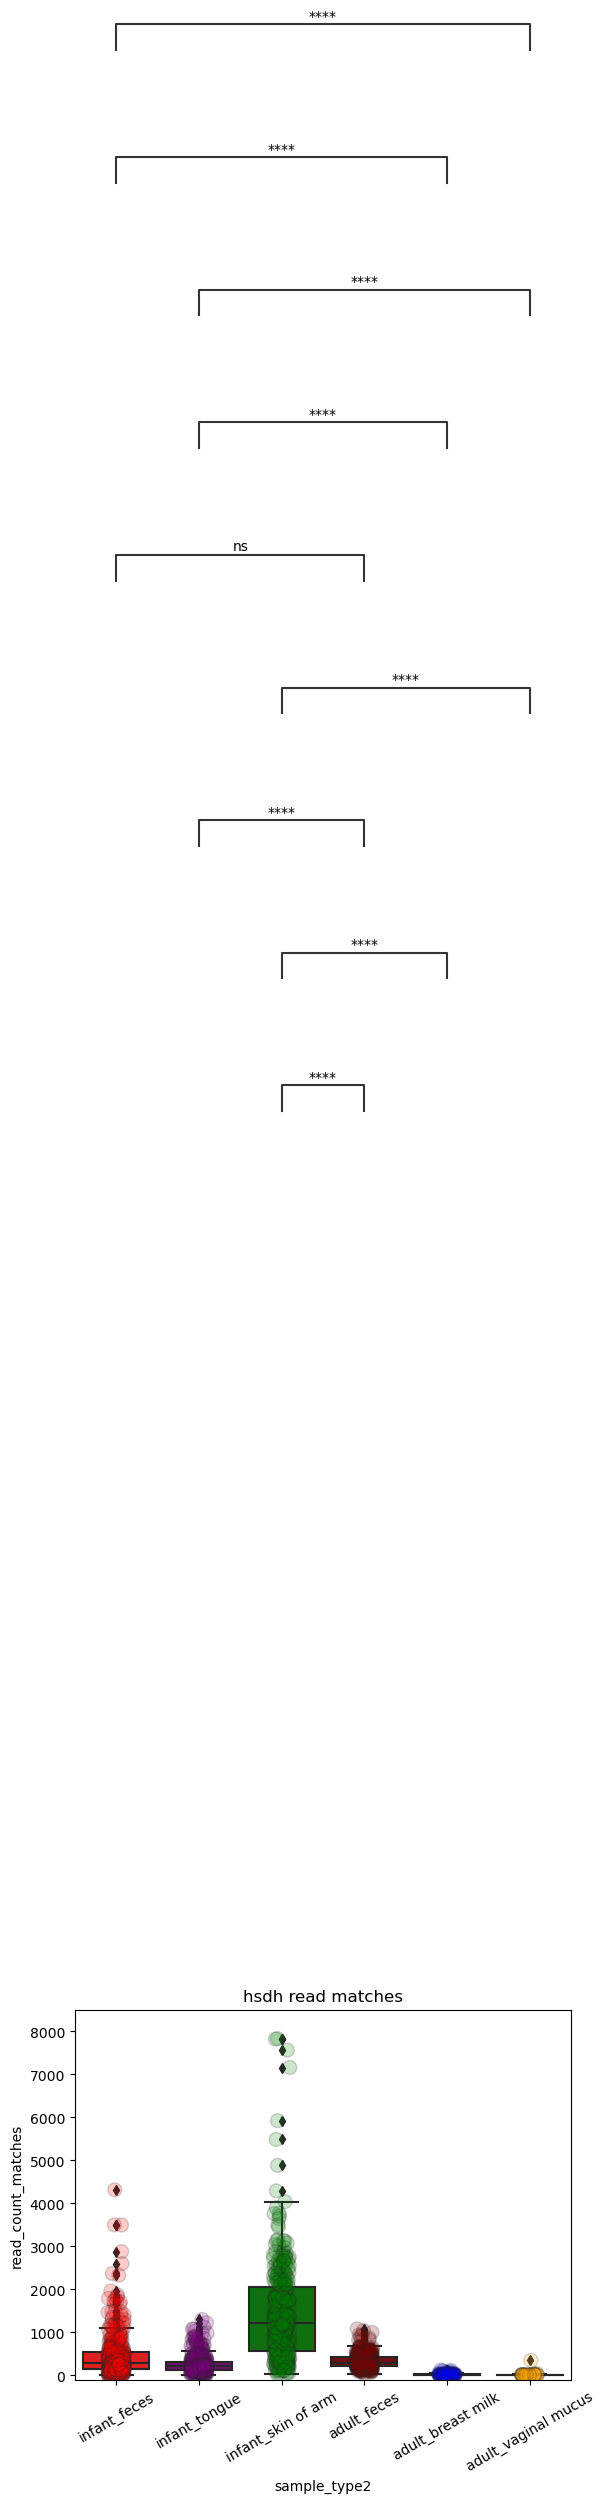

In [70]:
g = sns.boxplot(data=hsdh_plotting7, x='sample_type2', y='read_count_matches',
               order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'])
g = sns.stripplot(data=hsdh_plotting7, x='sample_type2', y='read_count_matches',
                 s=10, linewidth=1, 
               order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'], alpha=0.2)
pairs = [('adult_vaginal mucus', 'infant_feces'),
         ('adult_vaginal mucus', 'infant_skin of arm'),
         ('adult_vaginal mucus', 'infant_tongue'),
         ('infant_feces', 'adult_feces'),
         ('infant_feces', 'adult_breast milk'),
         ('infant_skin of arm', 'adult_feces'),
         ('infant_skin of arm', 'adult_breast milk'),
         ('infant_tongue', 'adult_feces'),
         ('infant_tongue', 'adult_breast milk'),]

annot = Annotator(g, pairs, data=hsdh_plotting7, x='sample_type2', y='read_count_matches',
               order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

plt.ylim(-100, 8500) #removes showing one 25000 outlier for infant skin
plt.title("hsdh read matches")
plt.xticks(rotation=30)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/hsdh_sfilt_boxscatter.png', dpi=150, bbox_inches='tight')

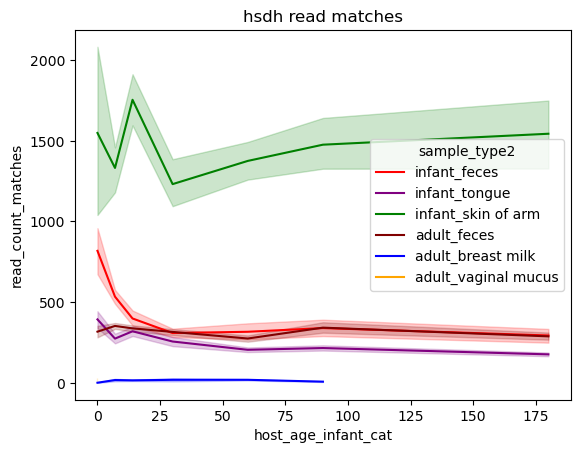

In [71]:
g = sns.lineplot(data=hsdh_plotting7, hue='sample_type2', x='host_age_infant_cat', y='read_count_matches',
               hue_order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'], ci=68)
plt.title("hsdh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/hsdh_sfilt_lineplot.png', dpi=150, bbox_inches='tight')

In [72]:
primary_hsdh = hsdh_ind_md[['stitle','pident']].groupby(['stitle']).count()
primary_hsdh2 = primary_hsdh.sort_values(by='pident', ascending=False)
primary_hsdh2

,pident
stitle,
sp|C8WJW0|3BHD1_EGGLE 3beta-hydroxysteroid dehydrogenase 1 OS=Eggerthella lenta (strain ATCC 25559 / DSM 2243 / CCUG 17323 / JCM 9979 / KCTC 3265 / NCTC 11813 / VPI 0255 / 1899 B) OX=479437 GN=Elen_0198 PE=1 SV=1,291583
tr|A0A3P6LME2|A0A3P6LME2_SHIDY 7-alpha-hydroxysteroid dehydrogenase OS=Shigella dysenteriae OX=622 GN=hdhA_2 PE=3 SV=1,270083
tr|A0A1N7SE74|A0A1N7SE74_9BURK 7-alpha-hydroxysteroid dehydrogenase OS=Paraburkholderia piptadeniae OX=1701573 GN=hdhA PE=3 SV=1,227599
tr|A0A389MPN4|A0A389MPN4_9HYPH 7-alpha-hydroxysteroid dehydrogenase OS=Methylobacterium sp OX=409 GN=hdhA PE=3 SV=1,148601
sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid dehydrogenase OS=Mediterraneibacter gnavus (strain ATCC 29149 / DSM 114966 / JCM 6515 / VPI C7-9) OX=411470 GN=baiA PE=1 SV=1,148465
...,...
tr|A0A2S8BR13|A0A2S8BR13_9MYCO 7-alpha-hydroxysteroid dehydrogenase OS=Mycobacterium talmoniae OX=1858794 GN=hdhA_3 PE=3 SV=1,4148
tr|A0A0F7KKV6|A0A0F7KKV6_9SPHN 7-alpha-hydroxysteroid dehydrogenase OS=Croceibacterium atlanticum OX=1267766 GN=hdhA PE=3 SV=1,3757
tr|A0A9W4CGV5|A0A9W4CGV5_9CYAN 7-alpha-hydroxysteroid dehydrogenase OS=Planktothrix pseudagardhii OX=132604 GN=hdhA PE=3 SV=1,2897


In [73]:
primary_hsdh2.head(2).index.tolist()

['sp|C8WJW0|3BHD1_EGGLE 3beta-hydroxysteroid dehydrogenase 1 OS=Eggerthella lenta (strain ATCC 25559 / DSM 2243 / CCUG 17323 / JCM 9979 / KCTC 3265 / NCTC 11813 / VPI 0255 / 1899 B) OX=479437 GN=Elen_0198 PE=1 SV=1',
 'tr|A0A3P6LME2|A0A3P6LME2_SHIDY 7-alpha-hydroxysteroid dehydrogenase OS=Shigella dysenteriae OX=622 GN=hdhA_2 PE=3 SV=1']

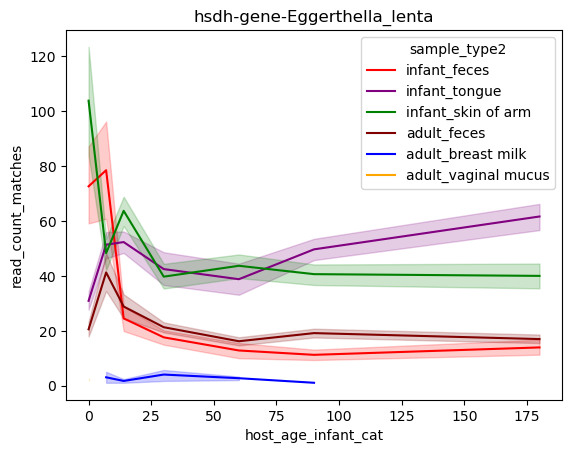

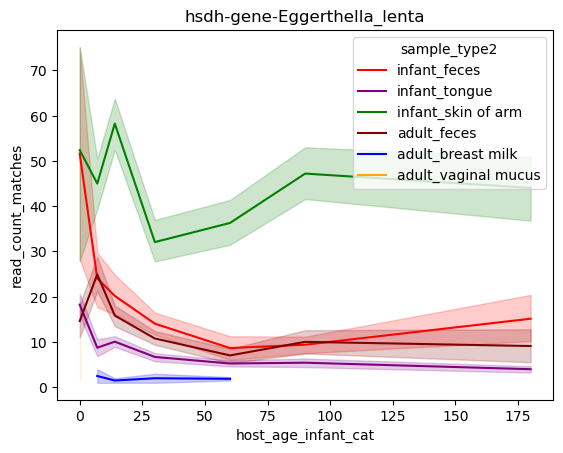

In [74]:
for x in primary_hsdh2[:2].index.values:
    g = sns.lineplot(data=hsdh_plotting6[hsdh_plotting6['stitle']==x], 
                 hue='sample_type2', x='host_age_infant_cat', y='read_count_matches',
               hue_order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'], ci=68)
    plt.rcParams['svg.fonttype'] = 'none'
    if x == 'sp|C8WJW0|3BHD1_EGGLE 3beta-hydroxysteroid dehydrogenase 1 OS=Eggerthella lenta (strain ATCC 25559 / DSM 2243 / CCUG 17323 / JCM 9979 / KCTC 3265 / NCTC 11813 / VPI 0255 / 1899 B) OX=479437 GN=Elen_0198 PE=1 SV=1':
        y='hsdh-gene-Eggerthella_lenta'
    elif x == 'tr|A5ZWV0|A5ZWV0_9FIRM Bile acid 7-dehydroxylase 1/3 OS=Blautia obeum ATCC 29174 OX=411459 GN=hsdhA PE=3 SV=1':
        y='hsdh-hsdhA_2-Shigella_dysenteriae'
    plt.title(y)
    #plt.savefig('../figures/hsdh_sfilt_%s_lineplot.png' %y, dpi=150, bbox_inches='tight')
    plt.show()

### fecal samples only

In [75]:
hsdh_imfeces = hsdh_plotting6[hsdh_plotting6['sample_type2'].isin(['infant_feces', 'adult_feces'])].copy()
hsdh_imfeces.head()

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches
0,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,0.0,infant_feces,Vaginal,102861,3
19,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,C-section,104551,155
20,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,C-section,114591,27
21,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,Vaginal,102511,86
22,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,Vaginal,114341,198


In [76]:
primary_fhsdh = hsdh_imfeces[['stitle','host_subject_id']].groupby(['stitle']).count()
primary_fhsdh.rename(columns={'host_subject_id': 'counts'}, inplace=True)
primary_fhsdh2 = primary_fhsdh.sort_values(by='counts', ascending=False)
primary_fhsdh2.head(10)

,counts
stitle,
tr|A0A1N7SE74|A0A1N7SE74_9BURK 7-alpha-hydroxysteroid dehydrogenase OS=Paraburkholderia piptadeniae OX=1701573 GN=hdhA PE=3 SV=1,736
sp|C8WJW0|3BHD1_EGGLE 3beta-hydroxysteroid dehydrogenase 1 OS=Eggerthella lenta (strain ATCC 25559 / DSM 2243 / CCUG 17323 / JCM 9979 / KCTC 3265 / NCTC 11813 / VPI 0255 / 1899 B) OX=479437 GN=Elen_0198 PE=1 SV=1,732
sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid dehydrogenase OS=Mediterraneibacter gnavus (strain ATCC 29149 / DSM 114966 / JCM 6515 / VPI C7-9) OX=411470 GN=baiA PE=1 SV=1,703
tr|A0A2H5YUU8|A0A2H5YUU8_UNCXX 7-alpha-hydroxysteroid dehydrogenase OS=bacterium HR26 OX=2035421 GN=hdhA PE=3 SV=1,591
tr|A0A0S3PWV7|A0A0S3PWV7_9BRAD 7-alpha-hydroxysteroid dehydrogenase OS=Variibacter gotjawalensis OX=1333996 GN=hdhA PE=3 SV=1,576
tr|A0A389MPN4|A0A389MPN4_9HYPH 7-alpha-hydroxysteroid dehydrogenase OS=Methylobacterium sp OX=409 GN=hdhA PE=3 SV=1,574
sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid dehydrogenase OS=Mediterraneibacter gnavus (strain ATCC 29149 / DSM 114966 / JCM 6515 / VPI C7-9) OX=411470 GN=RUMGNA_00694 PE=1 SV=1,533
tr|A0A0H9CEP6|A0A0H9CEP6_SHISO 7-alpha-hydroxysteroid dehydrogenase OS=Shigella sonnei OX=624 GN=hdhA PE=3 SV=1,521
tr|A0A2R8BEK4|A0A2R8BEK4_9RHOB 7-alpha-hydroxysteroid dehydrogenase OS=Ascidiaceihabitans donghaensis OX=1510460 GN=hdhA PE=3 SV=1,509


In [77]:
hsdh_imfeces2 = hsdh_imfeces[['host_age_infant_cat', 'sample_type2', 'host_subject_id',
                               'read_count_matches']].groupby(['host_age_infant_cat', 'host_subject_id',
                                                              'sample_type2']).sum().reset_index()
hsdh_imfeces2.head()

,host_age_infant_cat,host_subject_id,sample_type2,read_count_matches
0,0,100581,infant_feces,2
1,0,100771,infant_feces,1867
2,0,101060,adult_feces,578
3,0,101061,infant_feces,649
4,0,101630,adult_feces,226


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_infant_feces vs. 7_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:5.325e-01 U_stat=1.448e+03
0_infant_feces vs. 0_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:7.305e-01 U_stat=5.270e+02
14_infant_feces vs. 14_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:8.941e-01 U_stat=1.202e+03
30_infant_feces vs. 30_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:9.777e-01 U_stat=1.228e+03
60_infant_feces vs. 60_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:8.953e-01 U_stat=5.355e+02
90_infant_feces vs. 90_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.242

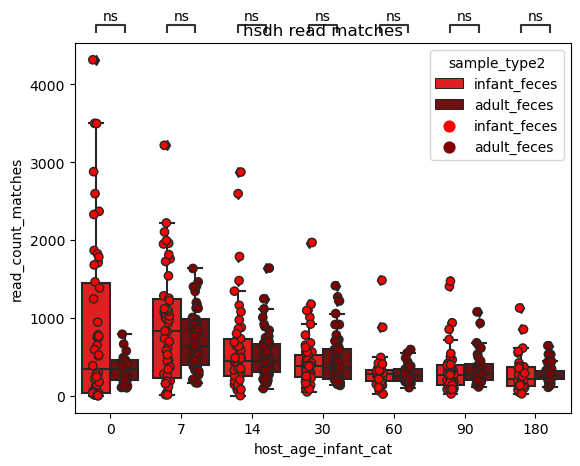

In [78]:
g = sns.boxplot(data=hsdh_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'])
g = sns.stripplot(data=hsdh_imfeces2, x='host_age_infant_cat', y='read_count_matches',
                 s=6, linewidth=1, hue='sample_type2', 
               hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'], dodge=True)
pairs = [((tp, 'infant_feces'),(tp, 'adult_feces')) for tp in hsdh_imfeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=hsdh_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

plt.title("hsdh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/hsdh_sfilt_boxscatter.png', dpi=150, bbox_inches='tight')

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_infant_feces vs. 7_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:5.325e-01 U_stat=1.448e+03
0_infant_feces vs. 0_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:7.305e-01 U_stat=5.270e+02
14_infant_feces vs. 14_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:8.941e-01 U_stat=1.202e+03
30_infant_feces vs. 30_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:9.777e-01 U_stat=1.228e+03
60_infant_feces vs. 60_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:8.953e-01 U_stat=5.355e+02
90_infant_feces vs. 90_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.242

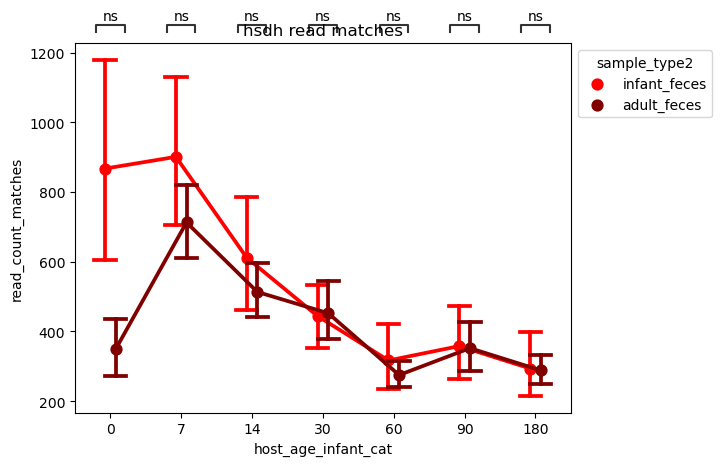

In [79]:
g = sns.pointplot(data=hsdh_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'], capsize=.3, dodge=0.15,)
                 #err_kws={'alpha': 0.5},) doesn't work

pairs = [((tp, 'infant_feces'),(tp, 'adult_feces')) for tp in hsdh_imfeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=hsdh_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("hsdh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/hsdh_feces_pointplot.png', dpi=150, bbox_inches='tight')

In [80]:
primary_fhsdh2.head(5).index.tolist()

['tr|A0A1N7SE74|A0A1N7SE74_9BURK 7-alpha-hydroxysteroid dehydrogenase OS=Paraburkholderia piptadeniae OX=1701573 GN=hdhA PE=3 SV=1',
 'sp|C8WJW0|3BHD1_EGGLE 3beta-hydroxysteroid dehydrogenase 1 OS=Eggerthella lenta (strain ATCC 25559 / DSM 2243 / CCUG 17323 / JCM 9979 / KCTC 3265 / NCTC 11813 / VPI 0255 / 1899 B) OX=479437 GN=Elen_0198 PE=1 SV=1',
 'sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid dehydrogenase OS=Mediterraneibacter gnavus (strain ATCC 29149 / DSM 114966 / JCM 6515 / VPI C7-9) OX=411470 GN=baiA PE=1 SV=1',
 'tr|A0A2H5YUU8|A0A2H5YUU8_UNCXX 7-alpha-hydroxysteroid dehydrogenase OS=bacterium HR26 OX=2035421 GN=hdhA PE=3 SV=1',
 'tr|A0A0S3PWV7|A0A0S3PWV7_9BRAD 7-alpha-hydroxysteroid dehydrogenase OS=Variibacter gotjawalensis OX=1333996 GN=hdhA PE=3 SV=1']

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_infant_feces vs. 7_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:6.989e-05 U_stat=5.949e+03
0_infant_feces vs. 0_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.075e-02 U_stat=5.690e+02
14_infant_feces vs. 14_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.460e-11 U_stat=4.582e+03
30_infant_feces vs. 30_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.399e-15 U_stat=4.365e+03
60_infant_feces vs. 60_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.904e-07 U_stat=8.915e+02
90_infant_feces vs. 90_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:9.916

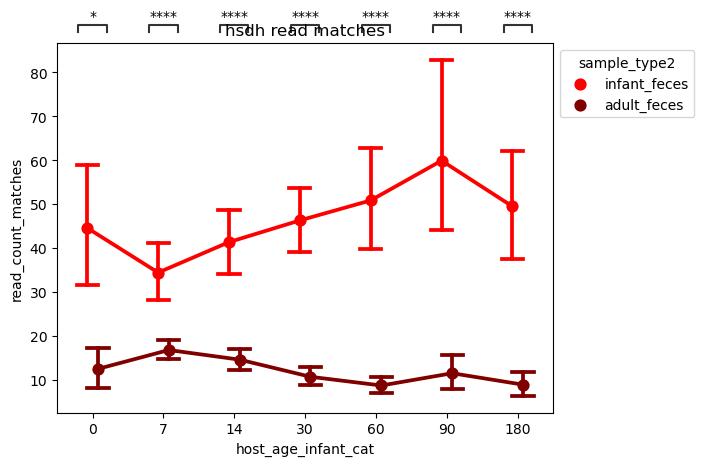

In [83]:
bact_interest = 'tr|A0A1N7SE74|A0A1N7SE74_9BURK 7-alpha-hydroxysteroid dehydrogenase OS=Paraburkholderia piptadeniae OX=1701573 GN=hdhA PE=3 SV=1'
bi_short='hdhA-Paraburkholderia_piptadeniae'

hsdh_imfeces_Pb = hsdh_imfeces[hsdh_imfeces['stitle']==bact_interest].copy()

g = sns.pointplot(data=hsdh_imfeces_Pb, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'], capsize=.3, dodge=0.15,)
                 #err_kws={'alpha': 0.5},) doesn't work

pairs = [((tp, 'infant_feces'),(tp, 'adult_feces')) for tp in hsdh_imfeces_Pb['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=hsdh_imfeces_Pb, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("hsdh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/hsdh_feces_pointplot_%s.svg' % bi_short, dpi=150, bbox_inches='tight')

### infant only

In [84]:
hsdh_ifeces = hsdh_plotting6[hsdh_plotting6['sample_type2'].isin(['infant_feces'])].copy()
hsdh_ifeces.head()

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches
0,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,0.0,infant_feces,Vaginal,102861,3
19,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,C-section,104551,155
20,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,C-section,114591,27
21,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,Vaginal,102511,86
22,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,Vaginal,114341,198


In [85]:
primary_fhsdh = hsdh_ifeces[['stitle', 'mode_delivery', 'host_subject_id']].groupby(['stitle', 'mode_delivery']).count()
primary_fhsdh.rename(columns={'host_subject_id': 'counts'}, inplace=True)
primary_fhsdh2 = primary_fhsdh.sort_values(by='counts', ascending=False)
primary_fhsdh2.head(10)
#not really enough for each indvidual, do as a whole

counts
stitle                                             mode_delivery        
tr|A0A1N7SE74|A0A1N7SE74_9BURK 7-alpha-hydroxys... C-section         181
                                                   Vaginal           180
sp|C8WJW0|3BHD1_EGGLE 3beta-hydroxysteroid dehy... C-section         175
                                                   Vaginal           174
sp|A7B3K3|3AHDP_MEDG7 3alpha-hydroxysteroid deh... Vaginal           173
                                                   C-section         163
tr|A0A389MPN4|A0A389MPN4_9HYPH 7-alpha-hydroxys... Vaginal           147
tr|A0A2H5YUU8|A0A2H5YUU8_UNCXX 7-alpha-hydroxys... Vaginal           143
tr|A0A2S6TIY3|A0A2S6TIY3_9PROT 7-alpha-hydroxys... C-section         141
tr|A0A0S3PWV7|A0A0S3PWV7_9BRAD 7-alpha-hydroxys... Vaginal           139

In [86]:
hsdh_ifeces2 = hsdh_ifeces[['host_age_infant_cat', 'sample_type2', 'host_subject_id', 'mode_delivery',
                               'read_count_matches']].groupby(['host_age_infant_cat', 'mode_delivery', 'host_subject_id',
                                                              'sample_type2']).sum().reset_index()
hsdh_ifeces2.head()

,host_age_infant_cat,mode_delivery,host_subject_id,sample_type2,read_count_matches
0,0,C-section,100771,infant_feces,1867
1,0,C-section,102681,infant_feces,30
2,0,C-section,103141,infant_feces,3498
3,0,C-section,104551,infant_feces,756
4,0,C-section,105711,infant_feces,120


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_Vaginal vs. 7_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.358e-01 U_stat=2.725e+02
0_Vaginal vs. 0_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.085e-03 U_stat=1.530e+02
14_Vaginal vs. 14_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.478e-01 U_stat=3.445e+02
30_Vaginal vs. 30_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.358e-01 U_stat=3.460e+02
60_Vaginal vs. 60_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.408e-01 U_stat=8.500e+01
90_Vaginal vs. 90_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.652e-02 (ns) U_stat=2.445e+02
180_Vaginal vs.

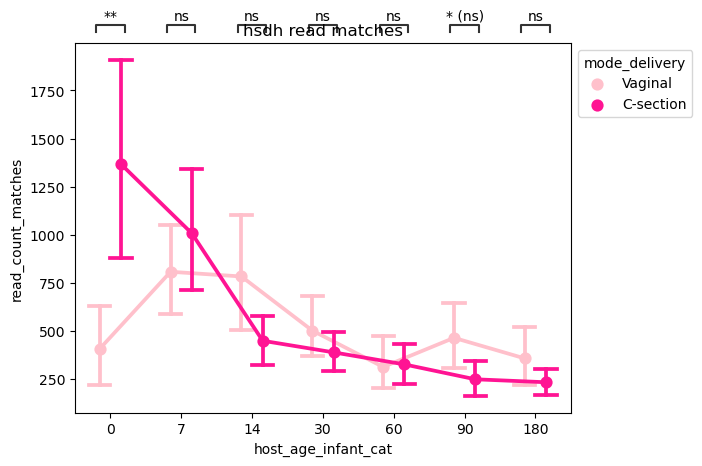

In [87]:
g = sns.pointplot(data=hsdh_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'],
                palette=['pink', 'deeppink'], capsize=.3, dodge=0.3,)

pairs = [((tp, 'Vaginal'),(tp, 'C-section')) for tp in hsdh_ifeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=hsdh_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("hsdh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/hsdh_ifeces_pointplot_dmode.png', dpi=150, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_Vaginal vs. 7_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:3.358e-01 U_stat=2.725e+02
0_Vaginal vs. 0_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:2.085e-03 U_stat=1.530e+02
14_Vaginal vs. 14_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:1.478e-01 U_stat=3.445e+02
30_Vaginal vs. 30_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:2.358e-01 U_stat=3.460e+02
60_Vaginal vs. 60_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:3.408e-01 U_stat=8.500e+01
90_Vaginal vs. 90_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:2.652e-02 U_stat=2.445e+02
180_Vaginal vs. 180_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:4.553e-01 U_stat=1.310e+02


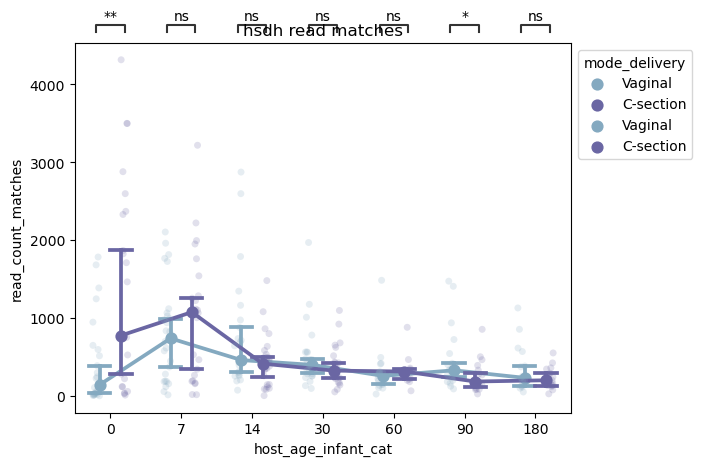

In [88]:
palette1 = ['pink', 'deeppink']
palette2 = ['#84A9C0', '#6A66A3']

g = sns.pointplot(data=hsdh_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'], estimator=np.median,
                palette=palette2, capsize=.3, dodge=0.3, error_bar=('pi', 50))

g = sns.stripplot(data=hsdh_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'], 
                palette=palette2, dodge=0.2, alpha=0.2)

pairs = [((tp, 'Vaginal'),(tp, 'C-section')) for tp in hsdh_ifeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=hsdh_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'])
annot.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("hsdh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/hsdh_ifeces_pointplot_dmode.svg', dpi=150, bbox_inches='tight')

In [89]:
data = hsdh_ifeces2.copy()
data.dropna(subset=['read_count_matches'], inplace=True) #need to drop nans
model = smf.mixedlm("read_count_matches~host_age_infant_cat*mode_delivery", data, 
                        groups="host_subject_id", re_formula="1" )
res = model.fit(method=['lbfgs',  'powell', 'cg'])
print("LME for hsdh read count matches")
print(res.summary())

LME for hsdh read count matches
                           Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          read_count_matches
No. Observations:           293              Method:                      REML              
No. Groups:                 55               Scale:                       400637.0775       
Min. group size:            4                Log-Likelihood:              -2294.9397        
Max. group size:            7                Converged:                   Yes               
Mean group size:            5.3                                                             
--------------------------------------------------------------------------------------------
                                              Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
--------------------------------------------------------------------------------------------
Intercept                                     849.677   70.890 11.

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


In [90]:
hsdh_ifeces_short = hsdh_ifeces[hsdh_ifeces['host_age_infant']<46].copy()

conditions = [
    (hsdh_ifeces_short['host_age_infant'] >= 0) & (hsdh_ifeces_short['host_age_infant'] <= 7),   # 0 to 7 (exclusive 7)
    (hsdh_ifeces_short['host_age_infant'] >= 14) & (hsdh_ifeces_short['host_age_infant'] <= 28), # 14 to 28 (exclusive 28)
    (hsdh_ifeces_short['host_age_infant'] >= 30) & (hsdh_ifeces_short['host_age_infant'] <= 45) # 30 to 45 (inclusive 45)
]
choices = ['Category 0-7', 'Category 14-28', 'Category 30-45']

hsdh_ifeces_short['metab_time_cat'] = np.select(conditions, choices, default='other')
hsdh_ifeces_short.head()

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches,metab_time_cat
0,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,0.0,infant_feces,Vaginal,102861,3,Category 0-7
19,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,C-section,104551,155,Category 0-7
20,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,C-section,114591,27,Category 0-7
21,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,Vaginal,102511,86,Category 0-7
22,sp|A7AZH2|3BHDP_MEDG7 3beta-hydroxysteroid deh...,0,1.0,infant_feces,Vaginal,114341,198,Category 0-7


In [91]:
hsdh_ifeces_short2 = hsdh_ifeces_short[['metab_time_cat', 'host_subject_id', 'mode_delivery',
                               'read_count_matches']].groupby(['metab_time_cat', 'mode_delivery', 'host_subject_id',]).sum().reset_index()
hsdh_ifeces_short2.head()

,metab_time_cat,mode_delivery,host_subject_id,read_count_matches
0,Category 0-7,C-section,100771,1885
1,Category 0-7,C-section,102681,46
2,Category 0-7,C-section,103141,3620
3,Category 0-7,C-section,103741,64
4,Category 0-7,C-section,103951,1067


In [92]:
[((tp, 'Vaginal'),(tp, 'C-section')) for tp in ['Category 0-7', 'Category 14-28', 'Category 30-45']]

[(('Category 0-7', 'Vaginal'), ('Category 0-7', 'C-section')),
 (('Category 14-28', 'Vaginal'), ('Category 14-28', 'C-section')),
 (('Category 30-45', 'Vaginal'), ('Category 30-45', 'C-section'))]

Category 14-28_C-section vs. Category 14-28_Vaginal: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.420e-01 U_stat=2.410e+02
Category 0-7_C-section vs. Category 0-7_Vaginal: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.335e-02 (ns) U_stat=4.880e+02
Category 30-45_C-section vs. Category 30-45_Vaginal: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.818e-02 (ns) U_stat=8.600e+01


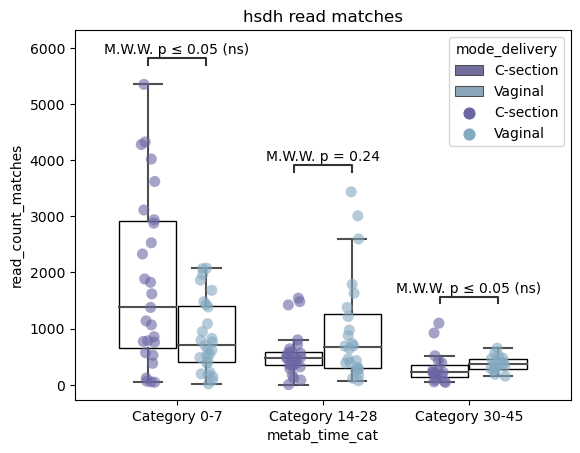

In [93]:
df = hsdh_ifeces_short2[~(hsdh_ifeces_short2['metab_time_cat']=='other')].copy()
pale2e = ['#6A66A3','#84A9C0']
g = sns.boxplot(data=df,
            x='metab_time_cat', y='read_count_matches', hue='mode_delivery',
            hue_order=['C-section', 'Vaginal'],
            palette=pale2e, fliersize=0, boxprops=dict(facecolor='none', edgecolor='black', linewidth=1))
g = sns.stripplot(data=df,
            x='metab_time_cat', y='read_count_matches', hue='mode_delivery',
              hue_order=['C-section', 'Vaginal'],
            palette=pale2e, alpha=0.6, dodge=True, s=8)

pairs = [((tp, 'Vaginal'),(tp, 'C-section')) for tp in ['Category 0-7', 'Category 14-28', 'Category 30-45']]
annot = Annotator(g, pairs, data=df,
            x='metab_time_cat', y='read_count_matches', hue='mode_delivery',
            hue_order=['C-section', 'Vaginal'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='simple', loc='inside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

plt.title("hsdh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/hsdh_early_ifeces_boxplot_dmode.svg', dpi=150, bbox_inches='tight')

# bsh

In [94]:
bsh_indv = pd.read_csv('../../data/Microbiome/genes_interest/Sepsis_Gates_indv_bsh_blastx_matches.csv')
bsh_indv.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,qstart,qtitle,send,slen,sseqid,sstart,stitle
0,41.2,9.800000e-09,0,26540,30,15,50.0,92,151,A00953:688:HVGW2DSX5:3:1101:31901:11021/1,3,A00953:688:HVGW2DSX5:3:1101:31901:11021/1,194,329,tr|A0A956MW32|A0A956MW32_9FIRM,165,tr|A0A956MW32|A0A956MW32_9FIRM choloylglycine ...
1,32.3,1.390000e-05,0,26540,25,12,52.0,146,151,A00953:688:HVGW2DSX5:3:1118:19235:21183/1,72,A00953:688:HVGW2DSX5:3:1118:19235:21183/1,230,324,tr|A0A943BKT3|A0A943BKT3_UNCFI,206,tr|A0A943BKT3|A0A943BKT3_UNCFI choloylglycine ...
2,44.7,6.130000e-10,0,26540,34,13,61.8,46,151,A00953:688:HVGW2DSX5:3:1329:3947:2253/1,147,A00953:688:HVGW2DSX5:3:1329:3947:2253/1,78,1072,tr|A0A9P1FEA4|A0A9P1FEA4_9DINO,45,tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile...
3,28.9,2.510000e-04,0,26540,19,9,52.6,88,151,A00953:688:HVGW2DSX5:3:2151:23963:15499/1,144,A00953:688:HVGW2DSX5:3:2151:23963:15499/1,21,329,tr|A0A9Q9FGY1|A0A9Q9FGY1_9FIRM,3,tr|A0A9Q9FGY1|A0A9Q9FGY1_9FIRM choloylglycine ...
4,32.3,1.390000e-05,0,26540,25,12,52.0,146,151,A00953:688:HVGW2DSX5:3:2614:9842:4633/1,72,A00953:688:HVGW2DSX5:3:2614:9842:4633/1,230,324,tr|A0A943BKT3|A0A943BKT3_UNCFI,206,tr|A0A943BKT3|A0A943BKT3_UNCFI choloylglycine ...


In [96]:
bsh_indv.length.describe()

count    913877.000000
mean         42.229037
std           9.388528
min          11.000000
25%          36.000000
50%          47.000000
75%          50.000000
max          68.000000
Name: length, dtype: float64

In [97]:
bsh_indv.columns

Index(['bitscore', 'evalue', 'gapopen', 'identification', 'length', 'mismatch',
       'pident', 'qend', 'qlen', 'qseqid', 'qstart', 'qtitle', 'send', 'slen',
       'sseqid', 'sstart', 'stitle'],
      dtype='object')

In [98]:
bsh_indv.identification.nunique()

1511

In [99]:
bsh_indv.identification.dtype

dtype('int64')

In [100]:
bsh_indv.identification = bsh_indv.identification.astype(str)

In [101]:
bsh_ind_md = pd.merge(bsh_indv, metadata[['host_subject_id', 'host_age_infant_cat', 'host_age_infant', 'mode_delivery', 'sample_type2', 'tube_id']], 
                       left_on='identification', right_on='tube_id')
bsh_ind_md.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,...,slen,sseqid,sstart,stitle,host_subject_id,host_age_infant_cat,host_age_infant,mode_delivery,sample_type2,tube_id
0,41.2,9.800000e-09,0,26540,30,15,50.0,92,151,A00953:688:HVGW2DSX5:3:1101:31901:11021/1,...,329,tr|A0A956MW32|A0A956MW32_9FIRM,165,tr|A0A956MW32|A0A956MW32_9FIRM choloylglycine ...,104361,14,14.0,C-section,infant_skin of arm,26540
1,32.3,1.390000e-05,0,26540,25,12,52.0,146,151,A00953:688:HVGW2DSX5:3:1118:19235:21183/1,...,324,tr|A0A943BKT3|A0A943BKT3_UNCFI,206,tr|A0A943BKT3|A0A943BKT3_UNCFI choloylglycine ...,104361,14,14.0,C-section,infant_skin of arm,26540
2,44.7,6.130000e-10,0,26540,34,13,61.8,46,151,A00953:688:HVGW2DSX5:3:1329:3947:2253/1,...,1072,tr|A0A9P1FEA4|A0A9P1FEA4_9DINO,45,tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile...,104361,14,14.0,C-section,infant_skin of arm,26540
3,28.9,2.510000e-04,0,26540,19,9,52.6,88,151,A00953:688:HVGW2DSX5:3:2151:23963:15499/1,...,329,tr|A0A9Q9FGY1|A0A9Q9FGY1_9FIRM,3,tr|A0A9Q9FGY1|A0A9Q9FGY1_9FIRM choloylglycine ...,104361,14,14.0,C-section,infant_skin of arm,26540
4,32.3,1.390000e-05,0,26540,25,12,52.0,146,151,A00953:688:HVGW2DSX5:3:2614:9842:4633/1,...,324,tr|A0A943BKT3|A0A943BKT3_UNCFI,206,tr|A0A943BKT3|A0A943BKT3_UNCFI choloylglycine ...,104361,14,14.0,C-section,infant_skin of arm,26540


In [102]:
bsh_ind_md.shape

(913877, 23)

In [103]:
bsh_ind_md.length.describe()
#set match length to ~40

count    913877.000000
mean         42.229037
std           9.388528
min          11.000000
25%          36.000000
50%          47.000000
75%          50.000000
max          68.000000
Name: length, dtype: float64

In [104]:
bsh_ind_gtp = bsh_ind_md[['stitle', 'sample_type2', 'pident']].copy()
bsh_ind_gtp.head()

,stitle,sample_type2,pident
0,tr|A0A956MW32|A0A956MW32_9FIRM choloylglycine ...,infant_skin of arm,50.0
1,tr|A0A943BKT3|A0A943BKT3_UNCFI choloylglycine ...,infant_skin of arm,52.0
2,tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile...,infant_skin of arm,61.8
3,tr|A0A9Q9FGY1|A0A9Q9FGY1_9FIRM choloylglycine ...,infant_skin of arm,52.6
4,tr|A0A943BKT3|A0A943BKT3_UNCFI choloylglycine ...,infant_skin of arm,52.0


In [105]:
bsh_ind_gtp.groupby(['stitle', 'sample_type2']).count()

pident
stitle                                             sample_type2               
sp|A5HKP3|CBH_LACAI Conjugated bile acid hydrol... adult_breast milk         5
                                                   adult_feces             366
                                                   adult_vaginal mucus       1
                                                   infant_feces           4166
                                                   infant_skin of arm       85
...                                                                        ...
tr|Q53CP8|Q53CP8_9BIFI choloylglycine hydrolase... adult_breast milk         5
                                                   adult_feces             406
                                                   infant_feces             72
                                                   infant_skin of arm     1013
                                                   infant_tongue           534

[551 rows x 1 columns]

In [106]:
primary_bsh = bsh_ind_md[['stitle','pident']].groupby(['stitle']).count()
primary_bsh.sort_values(by='pident', ascending=False).head(20)

,pident
stitle,
tr|G4XR37|G4XR37_BIFBR choloylglycine hydrolase OS=Bifidobacterium breve OX=1685 GN=bsh PE=3 SV=1,480608
tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile acid hydrolase (CBAH) (Bile sal t hydrolase) (BSH) (CBAH-1) (Choloylglycine hydrolase) OS=Cladocopium goreaui OX=2562237 GN=C1SCF055_LOCUS85 PE=3 SV=1,161744
tr|A0A2S7MA35|A0A2S7MA35_ENTFC choloylglycine hydrolase OS=Enterococcus faecium OX=1352 GN=bsh PE=3 SV=1,35188
tr|A0A943NW78|A0A943NW78_9ACTN choloylglycine hydrolase OS=Collinsella sp OX=1965294 GN=bsh PE=3 SV=1,31365
tr|A0AAQ2XKM9|A0AAQ2XKM9_9LACO choloylglycine hydrolase OS=Ligilactobacillus ruminis OX=1623 GN=bsh PE=3 SV=1,11493
tr|A0A9E0FJ13|A0A9E0FJ13_9FIRM choloylglycine hydrolase OS=Lachnospira sp OX=2049031 GN=bsh PE=3 SV=1,11263
sp|A5HKP3|CBH_LACAI Conjugated bile acid hydrolase OS=Lactobacillus acidophilus OX=1579 GN=bsh PE=1 SV=1,9166
tr|A0A943HA91|A0A943HA91_CLOSP choloylglycine hydrolase OS=Clostridium sp OX=1506 GN=bsh PE=3 SV=1,7818
tr|A0A8I1JCY7|A0A8I1JCY7_9FIRM choloylglycine hydrolase OS=Oscillospiraceae bacterium OX=2485925 GN=bsh PE=3 SV=1,7165


In [107]:
primary_bsh.sort_values(by='pident', ascending=False).to_csv('../../data/Microbiome/genes_interest/indv_bsh_summary_top_counts.csv')

In [108]:
bsh_plotting = bsh_ind_md.copy()
bsh_plotting2 = bsh_plotting[bsh_plotting['pident']>50].copy()
bsh_plotting3 = bsh_plotting2[bsh_plotting2['evalue']<0.00001].copy()
bsh_plotting4 = bsh_plotting3[bsh_plotting3['length']>40].copy()
bsh_plotting5 = bsh_plotting4[['stitle', 'host_age_infant_cat', 'host_age_infant', 'sample_type2', 'mode_delivery', 'host_subject_id', 'pident']].copy()
bsh_plotting6 = bsh_plotting5.groupby(['stitle', 'host_age_infant_cat', 'host_age_infant', 'sample_type2', 'mode_delivery', 'host_subject_id']).count().reset_index()
bsh_plotting6.rename(columns={'pident':'read_count_matches'}, inplace=True)
bsh_plotting6.head()
# pident 50%, length match 40bp+

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches
0,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,adult_vaginal mucus,Vaginal,117050,1
1,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_feces,Vaginal,123471,20
2,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_tongue,C-section,104361,4
3,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_tongue,C-section,111121,2
4,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_tongue,C-section,115451,6


In [109]:
bsh_plotting7 = bsh_plotting6[['host_age_infant_cat', 'host_age_infant', 
                               'sample_type2', 'host_subject_id', 
                               'read_count_matches']].groupby(['host_age_infant_cat', 'host_age_infant', 
                                                               'sample_type2', 'host_subject_id']).sum().reset_index()
bsh_plotting7.head()

,host_age_infant_cat,host_age_infant,sample_type2,host_subject_id,read_count_matches
0,0,0.0,adult_vaginal mucus,107270,1
1,0,0.0,infant_feces,102861,12
2,0,0.0,infant_feces,102911,7
3,0,0.0,infant_feces,104371,5
4,0,0.0,infant_feces,110901,11


In [110]:
list(combinations(bsh_plotting7.sample_type2.unique(), 2))

[('adult_vaginal mucus', 'infant_feces'),
 ('adult_vaginal mucus', 'infant_skin of arm'),
 ('adult_vaginal mucus', 'infant_tongue'),
 ('adult_vaginal mucus', 'adult_feces'),
 ('adult_vaginal mucus', 'adult_breast milk'),
 ('infant_feces', 'infant_skin of arm'),
 ('infant_feces', 'infant_tongue'),
 ('infant_feces', 'adult_feces'),
 ('infant_feces', 'adult_breast milk'),
 ('infant_skin of arm', 'infant_tongue'),
 ('infant_skin of arm', 'adult_feces'),
 ('infant_skin of arm', 'adult_breast milk'),
 ('infant_tongue', 'adult_feces'),
 ('infant_tongue', 'adult_breast milk'),
 ('adult_feces', 'adult_breast milk')]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

infant_skin of arm vs. adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:4.222e-109 U_stat=1.672e+03
infant_skin of arm vs. adult_breast milk: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:9.392e-03 U_stat=5.028e+03
infant_tongue vs. adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:5.121e-80 U_stat=1.171e+04
infant_skin of arm vs. adult_vaginal mucus: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.062e-01 U_stat=2.930e+03
infant_feces vs. adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:4.179e-08 U_stat=8.654e+04
infant_tongue vs. adult_breast milk: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_

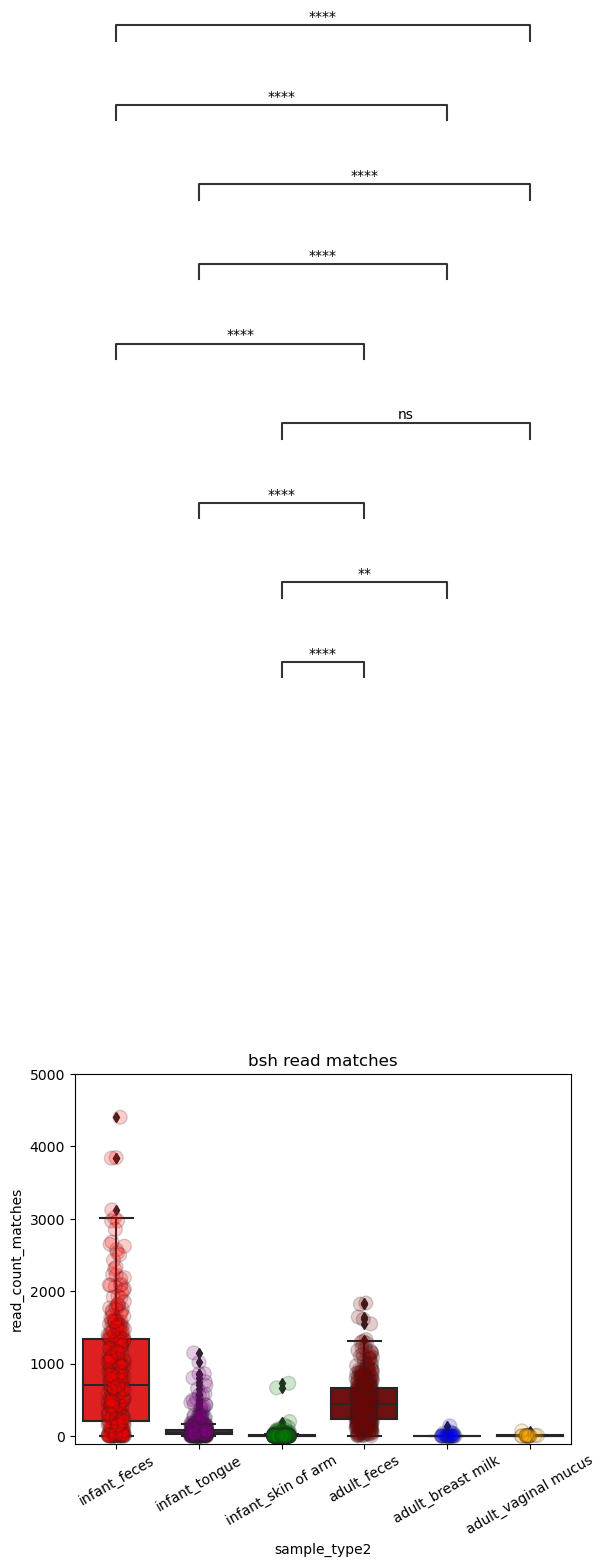

In [111]:
g = sns.boxplot(data=bsh_plotting7, x='sample_type2', y='read_count_matches',
               order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'])
g = sns.stripplot(data=bsh_plotting7, x='sample_type2', y='read_count_matches',
                 s=10, linewidth=1, 
               order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'], alpha=0.2)
pairs = [('adult_vaginal mucus', 'infant_feces'),
         ('adult_vaginal mucus', 'infant_skin of arm'),
         ('adult_vaginal mucus', 'infant_tongue'),
         ('infant_feces', 'adult_feces'),
         ('infant_feces', 'adult_breast milk'),
         ('infant_skin of arm', 'adult_feces'),
         ('infant_skin of arm', 'adult_breast milk'),
         ('infant_tongue', 'adult_feces'),
         ('infant_tongue', 'adult_breast milk'),]

annot = Annotator(g, pairs, data=bsh_plotting7, x='sample_type2', y='read_count_matches',
               order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

plt.ylim(-100, 5000) #removes showing one 10000 outlier for infant skin
plt.title("bsh read matches")
plt.xticks(rotation=30)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_sfilt_boxscatter.png', dpi=150, bbox_inches='tight')

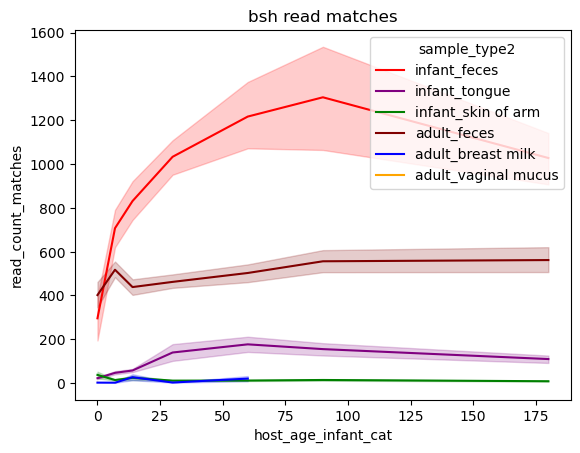

In [112]:
g = sns.lineplot(data=bsh_plotting7, hue='sample_type2', x='host_age_infant_cat', y='read_count_matches',
               hue_order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'], ci=68)
plt.title("bsh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_sfilt_lineplot.png', dpi=150, bbox_inches='tight')

In [113]:
primary_bsh = bsh_ind_md[['stitle','pident']].groupby(['stitle']).count()
primary_bsh2 = primary_bsh.sort_values(by='pident', ascending=False)
primary_bsh2

,pident
stitle,
tr|G4XR37|G4XR37_BIFBR choloylglycine hydrolase OS=Bifidobacterium breve OX=1685 GN=bsh PE=3 SV=1,480608
tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile acid hydrolase (CBAH) (Bile sal t hydrolase) (BSH) (CBAH-1) (Choloylglycine hydrolase) OS=Cladocopium goreaui OX=2562237 GN=C1SCF055_LOCUS85 PE=3 SV=1,161744
tr|A0A2S7MA35|A0A2S7MA35_ENTFC choloylglycine hydrolase OS=Enterococcus faecium OX=1352 GN=bsh PE=3 SV=1,35188
tr|A0A943NW78|A0A943NW78_9ACTN choloylglycine hydrolase OS=Collinsella sp OX=1965294 GN=bsh PE=3 SV=1,31365
tr|A0AAQ2XKM9|A0AAQ2XKM9_9LACO choloylglycine hydrolase OS=Ligilactobacillus ruminis OX=1623 GN=bsh PE=3 SV=1,11493
...,...
tr|A0A9D2GAM0|A0A9D2GAM0_9FIRM choloylglycine hydrolase OS=Candidatus Mediterraneibacter stercoravium OX=2838685 GN=bsh PE=3 SV=1,60
tr|A0A843H6R7|A0A843H6R7_9EURY choloylglycine hydrolase OS=Methanosphaera sp OX=2666342 GN=bsh PE=3 SV=1,57
tr|A0A9P1FSE1|A0A9P1FSE1_9DINO Conjugated bile acid hydrolase (CBAH) (Bile sal t hydrolase) (BSH) (CBAH-1) (Choloylglycine hydrolase) OS=Cladocopium goreaui OX=2562237 GN=C1SCF055_LOCUS12261 PE=3 SV=1,57


In [114]:
primary_bsh2.head(4).index.tolist()

['tr|G4XR37|G4XR37_BIFBR choloylglycine hydrolase OS=Bifidobacterium breve OX=1685 GN=bsh PE=3 SV=1',
 'tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile acid hydrolase (CBAH) (Bile sal t hydrolase) (BSH) (CBAH-1) (Choloylglycine hydrolase) OS=Cladocopium goreaui OX=2562237 GN=C1SCF055_LOCUS85 PE=3 SV=1',
 'tr|A0A2S7MA35|A0A2S7MA35_ENTFC choloylglycine hydrolase OS=Enterococcus faecium OX=1352 GN=bsh PE=3 SV=1',
 'tr|A0A943NW78|A0A943NW78_9ACTN choloylglycine hydrolase OS=Collinsella sp OX=1965294 GN=bsh PE=3 SV=1']

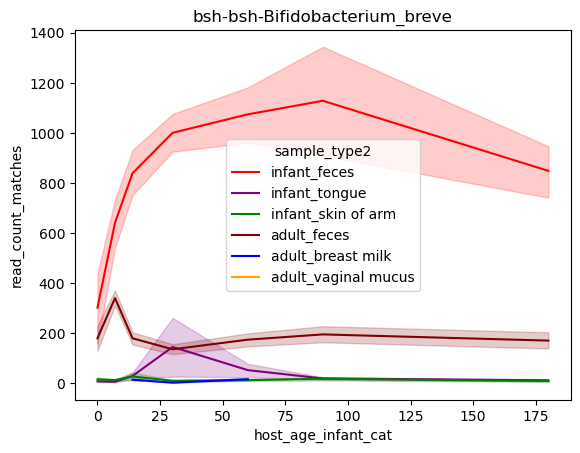

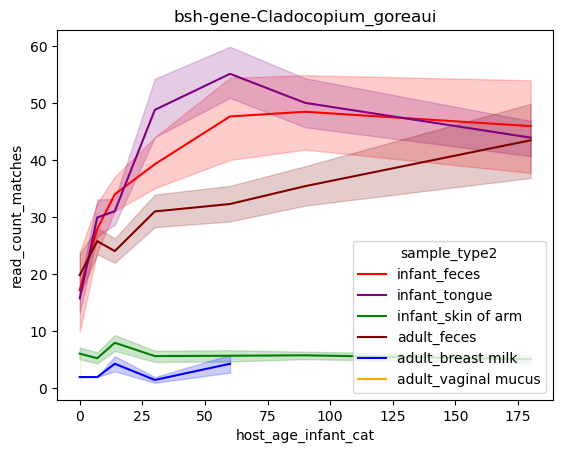

In [115]:
for x in primary_bsh2[:2].index.values:
    g = sns.lineplot(data=bsh_plotting6[bsh_plotting6['stitle']==x], 
                 hue='sample_type2', x='host_age_infant_cat', y='read_count_matches',
               hue_order=['infant_feces', 'infant_tongue', 'infant_skin of arm', 
                      'adult_feces', 'adult_breast milk', 'adult_vaginal mucus', ], 
                palette=['red', 'purple', 'green', 'maroon', 'blue', 'orange'], ci=68)
    plt.rcParams['svg.fonttype'] = 'none'
    if x == 'tr|G4XR37|G4XR37_BIFBR choloylglycine hydrolase OS=Bifidobacterium breve OX=1685 GN=bsh PE=3 SV=1':
        y='bsh-bsh-Bifidobacterium_breve'
    elif x == 'tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile acid hydrolase (CBAH) (Bile sal t hydrolase) (BSH) (CBAH-1) (Choloylglycine hydrolase) OS=Cladocopium goreaui OX=2562237 GN=C1SCF055_LOCUS85 PE=3 SV=1':
        y='bsh-gene-Cladocopium_goreaui'
    plt.title(y)
    #plt.savefig('../figures/bsh_sfilt_%s_lineplot.png' %y, dpi=150, bbox_inches='tight')
    plt.show()

### fecal samples only

In [116]:
bsh_imfeces = bsh_plotting6[bsh_plotting6['sample_type2'].isin(['infant_feces', 'adult_feces'])].copy()
bsh_imfeces.head()

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches
1,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_feces,Vaginal,123471,20
8,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,2.0,infant_feces,Vaginal,111961,2
9,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,4.0,infant_feces,C-section,115451,11
10,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,4.0,infant_feces,Vaginal,102281,2
11,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,5.0,adult_feces,C-section,114940,3


In [117]:
primary_fbsh = bsh_imfeces[['stitle','host_subject_id']].groupby(['stitle']).count()
primary_fbsh.rename(columns={'host_subject_id': 'counts'}, inplace=True)
primary_fbsh2 = primary_fbsh.sort_values(by='counts', ascending=False)
primary_fbsh2.head(10)

,counts
stitle,
tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile acid hydrolase (CBAH) (Bile sal t hydrolase) (BSH) (CBAH-1) (Choloylglycine hydrolase) OS=Cladocopium goreaui OX=2562237 GN=C1SCF055_LOCUS85 PE=3 SV=1,702
tr|G4XR37|G4XR37_BIFBR choloylglycine hydrolase OS=Bifidobacterium breve OX=1685 GN=bsh PE=3 SV=1,692
tr|A0A943NW78|A0A943NW78_9ACTN choloylglycine hydrolase OS=Collinsella sp OX=1965294 GN=bsh PE=3 SV=1,377
tr|A0A9E0FJ13|A0A9E0FJ13_9FIRM choloylglycine hydrolase OS=Lachnospira sp OX=2049031 GN=bsh PE=3 SV=1,333
tr|A0A2S7MA35|A0A2S7MA35_ENTFC choloylglycine hydrolase OS=Enterococcus faecium OX=1352 GN=bsh PE=3 SV=1,322
tr|A0A174DZA2|A0A174DZA2_9FIRM choloylglycine hydrolase OS=Fusicatenibacter saccharivorans OX=1150298 GN=cbh PE=3 SV=1,302
tr|A0A944APD2|A0A944APD2_9FIRM choloylglycine hydrolase OS=Eubacteriales bacterium OX=2831996 GN=bsh PE=3 SV=1,298
tr|A0AAW4MS08|A0AAW4MS08_9FIRM Choloylglycine hydrolase OS=Catenibacterium mitsuokai OX=100886 GN=bsh PE=4 SV=1,293
tr|A0A2T3G497|A0A2T3G497_9FIRM choloylglycine hydrolase OS=Faecalibacillus faecis OX=1982628 GN=bsh PE=3 SV=1,290


In [118]:
bsh_imfeces2 = bsh_imfeces[['host_age_infant_cat', 'sample_type2', 'host_subject_id',
                               'read_count_matches']].groupby(['host_age_infant_cat', 'host_subject_id',
                                                              'sample_type2']).sum().reset_index()
bsh_imfeces2.head()

,host_age_infant_cat,host_subject_id,sample_type2,read_count_matches
0,0,100771,infant_feces,34
1,0,101060,adult_feces,1345
2,0,101061,infant_feces,320
3,0,101630,adult_feces,883
4,0,101631,infant_feces,173


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_infant_feces vs. 7_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:6.183e-01 U_stat=1.249e+03
0_infant_feces vs. 0_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.354e-03 U_stat=2.125e+02
14_infant_feces vs. 14_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.206e-03 U_stat=1.626e+03
30_infant_feces vs. 30_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.148e-05 U_stat=1.796e+03
60_infant_feces vs. 60_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.701e-05 U_stat=8.390e+02
90_infant_feces vs. 90_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.389

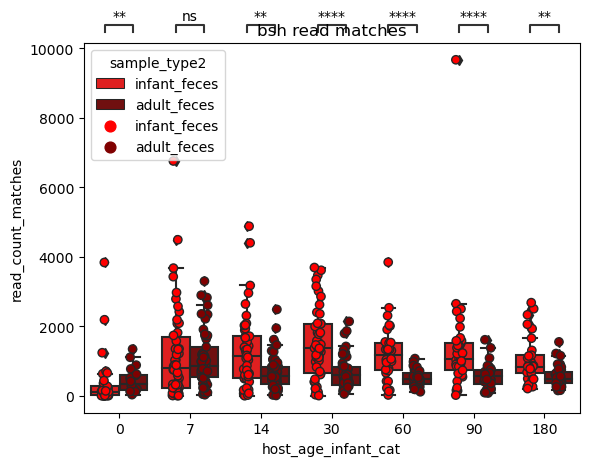

In [119]:
g = sns.boxplot(data=bsh_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'])
g = sns.stripplot(data=bsh_imfeces2, x='host_age_infant_cat', y='read_count_matches',
                 s=6, linewidth=1, hue='sample_type2', 
               hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'], dodge=True)
pairs = [((tp, 'infant_feces'),(tp, 'adult_feces')) for tp in bsh_imfeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=bsh_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

plt.title("bsh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_sfilt_boxscatter.png', dpi=150, bbox_inches='tight')

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_infant_feces vs. 7_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:6.183e-01 U_stat=1.249e+03
0_infant_feces vs. 0_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.354e-03 U_stat=2.125e+02
14_infant_feces vs. 14_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.206e-03 U_stat=1.626e+03
30_infant_feces vs. 30_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.148e-05 U_stat=1.796e+03
60_infant_feces vs. 60_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.701e-05 U_stat=8.390e+02
90_infant_feces vs. 90_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.389

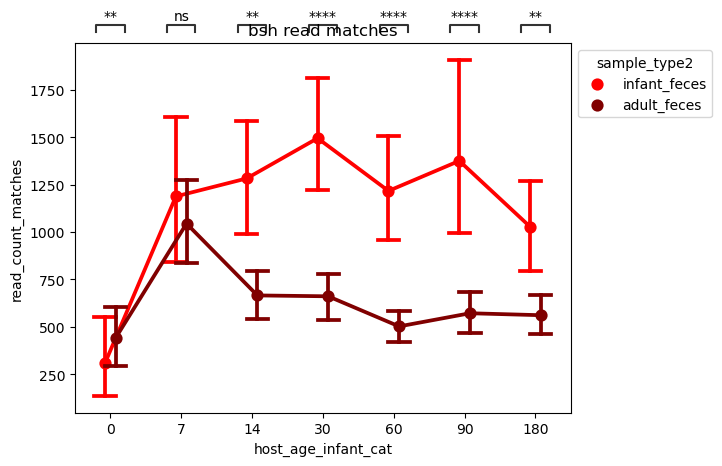

In [120]:
g = sns.pointplot(data=bsh_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'], capsize=.3, dodge=0.15,)
                 #err_kws={'alpha': 0.5},) doesn't work

pairs = [((tp, 'infant_feces'),(tp, 'adult_feces')) for tp in bsh_imfeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=bsh_imfeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("bsh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_feces_pointplot.png', dpi=150, bbox_inches='tight')

In [121]:
primary_fbsh2.head(5).index.tolist()

['tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile acid hydrolase (CBAH) (Bile sal t hydrolase) (BSH) (CBAH-1) (Choloylglycine hydrolase) OS=Cladocopium goreaui OX=2562237 GN=C1SCF055_LOCUS85 PE=3 SV=1',
 'tr|G4XR37|G4XR37_BIFBR choloylglycine hydrolase OS=Bifidobacterium breve OX=1685 GN=bsh PE=3 SV=1',
 'tr|A0A943NW78|A0A943NW78_9ACTN choloylglycine hydrolase OS=Collinsella sp OX=1965294 GN=bsh PE=3 SV=1',
 'tr|A0A9E0FJ13|A0A9E0FJ13_9FIRM choloylglycine hydrolase OS=Lachnospira sp OX=2049031 GN=bsh PE=3 SV=1',
 'tr|A0A2S7MA35|A0A2S7MA35_ENTFC choloylglycine hydrolase OS=Enterococcus faecium OX=1352 GN=bsh PE=3 SV=1']

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_infant_feces vs. 7_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:3.820e-01 U_stat=3.140e+03
0_infant_feces vs. 0_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.262e-03 U_stat=1.690e+02
14_infant_feces vs. 14_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:7.121e-03 U_stat=2.985e+03
30_infant_feces vs. 30_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.082e-01 U_stat=2.711e+03
60_infant_feces vs. 60_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.458e-01 U_stat=6.360e+02
90_infant_feces vs. 90_adult_feces: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.293

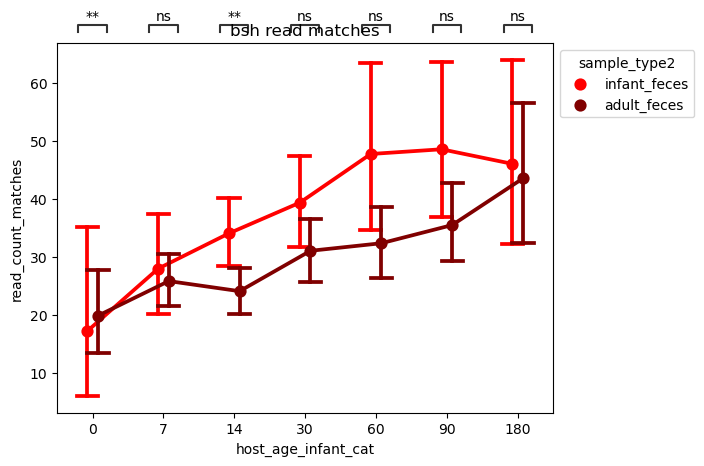

In [123]:
bact_interest = 'tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile acid hydrolase (CBAH) (Bile sal t hydrolase) (BSH) (CBAH-1) (Choloylglycine hydrolase) OS=Cladocopium goreaui OX=2562237 GN=C1SCF055_LOCUS85 PE=3 SV=1'
bi_short='bsh_Cladocopium_goreaui'

bsh_imfeces_Cg = bsh_imfeces[bsh_imfeces['stitle']==bact_interest].copy()

g = sns.pointplot(data=bsh_imfeces_Cg, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'], 
                palette=['red', 'maroon'], capsize=.3, dodge=0.15,)
                 #err_kws={'alpha': 0.5},) doesn't work

pairs = [((tp, 'infant_feces'),(tp, 'adult_feces')) for tp in bsh_imfeces_Cg['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=bsh_imfeces_Cg, x='host_age_infant_cat', y='read_count_matches',
               hue='sample_type2', hue_order=['infant_feces', 'adult_feces'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("bsh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_feces_pointplot_%s.svg' % bi_short, dpi=150, bbox_inches='tight')

### infant only

In [124]:
bsh_ifeces = bsh_plotting6[bsh_plotting6['sample_type2'].isin(['infant_feces'])].copy()
bsh_ifeces.head()

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches
1,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_feces,Vaginal,123471,20
8,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,2.0,infant_feces,Vaginal,111961,2
9,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,4.0,infant_feces,C-section,115451,11
10,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,4.0,infant_feces,Vaginal,102281,2
15,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,7.0,infant_feces,Vaginal,123231,6


In [125]:
primary_fbsh = bsh_ifeces[['stitle', 'mode_delivery', 'host_subject_id']].groupby(['stitle', 'mode_delivery']).count()
primary_fbsh.rename(columns={'host_subject_id': 'counts'}, inplace=True)
primary_fbsh2 = primary_fbsh.sort_values(by='counts', ascending=False)
primary_fbsh2.head(10)
#not really enough for each indvidual, do as a whole

counts
stitle                                             mode_delivery        
tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile ... Vaginal           170
tr|G4XR37|G4XR37_BIFBR choloylglycine hydrolase... Vaginal           168
tr|A0A9P1FEA4|A0A9P1FEA4_9DINO Conjugated bile ... C-section         155
tr|G4XR37|G4XR37_BIFBR choloylglycine hydrolase... C-section         150
tr|A0A2S7MA35|A0A2S7MA35_ENTFC choloylglycine h... C-section          75
                                                   Vaginal            65
tr|A0A9Q9FEX5|A0A9Q9FEX5_9FIRM choloylglycine h... C-section          59
tr|A0A9Q9FGV8|A0A9Q9FGV8_9FIRM choloylglycine h... C-section          47
tr|A0A943NW78|A0A943NW78_9ACTN choloylglycine h... Vaginal            47
tr|A0A9Q9FEX5|A0A9Q9FEX5_9FIRM choloylglycine h... Vaginal            41

In [126]:
bsh_ifeces2 = bsh_ifeces[['host_age_infant_cat', 'sample_type2', 'host_subject_id', 'mode_delivery',
                               'read_count_matches']].groupby(['host_age_infant_cat', 'mode_delivery', 'host_subject_id',
                                                              'sample_type2']).sum().reset_index()
bsh_ifeces2.head()

,host_age_infant_cat,mode_delivery,host_subject_id,sample_type2,read_count_matches
0,0,C-section,100771,infant_feces,34
1,0,C-section,102681,infant_feces,1
2,0,C-section,103141,infant_feces,132
3,0,C-section,104551,infant_feces,1
4,0,C-section,106841,infant_feces,173


In [127]:
data = bsh_ifeces2.copy()
data.dropna(subset=['read_count_matches'], inplace=True) #need to drop nans
model = smf.mixedlm("read_count_matches~host_age_infant_cat", data, 
                        groups="host_subject_id", re_formula="1" )
res = model.fit(method=['lbfgs',  'powell', 'cg'])
print("LME for bsh read count matches")
print(res.summary())

LME for bsh read count matches
               Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  read_count_matches
No. Observations:   283      Method:              REML              
No. Groups:         55       Scale:               1277684.3089      
Min. group size:    4        Log-Likelihood:      -2386.2861        
Max. group size:    7        Converged:           Yes               
Mean group size:    5.1                                             
--------------------------------------------------------------------
                      Coef.   Std.Err.   z    P>|z|  [0.025  0.975] 
--------------------------------------------------------------------
Intercept            1077.239   90.288 11.931 0.000 900.277 1254.200
host_age_infant_cat     1.209    1.236  0.978 0.328  -1.214    3.631
host_subject_id Var 23257.377   51.347                              



/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_Vaginal vs. 7_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:2.276e-02 U_stat=1.930e+02
0_Vaginal vs. 0_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:6.878e-01 U_stat=2.470e+02
14_Vaginal vs. 14_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:1.352e-01 U_stat=1.960e+02
30_Vaginal vs. 30_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:2.292e-01 U_stat=2.190e+02
60_Vaginal vs. 60_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:9.494e-01 U_stat=1.100e+02
90_Vaginal vs. 90_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:7.612e-01 U_stat=1.815e+02
180_Vaginal vs. 180_C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:6.482e-01 U_stat=1.240e+02


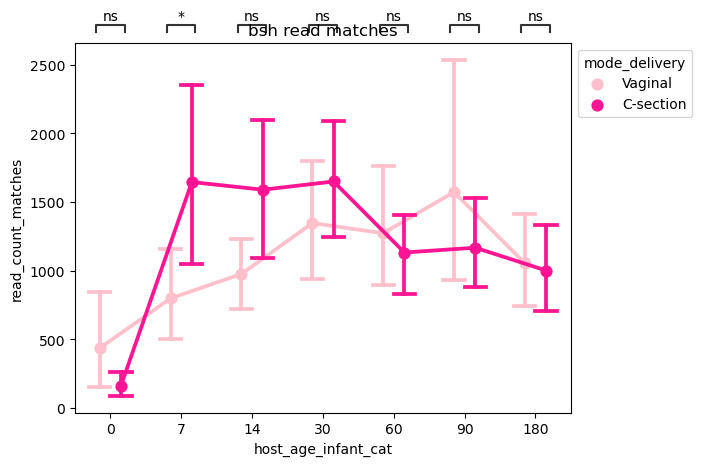

In [128]:
g = sns.pointplot(data=bsh_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'],
                palette=['pink', 'deeppink'], capsize=.3, dodge=0.3,)

pairs = [((tp, 'Vaginal'),(tp, 'C-section')) for tp in bsh_ifeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=bsh_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'])
annot.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("bsh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_ifeces_pointplot_dmode.png', dpi=150, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

7_Vaginal vs. 7_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.276e-02 (ns) U_stat=1.930e+02
0_Vaginal vs. 0_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:6.878e-01 U_stat=2.470e+02
14_Vaginal vs. 14_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.352e-01 U_stat=1.960e+02
30_Vaginal vs. 30_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:2.292e-01 U_stat=2.190e+02
60_Vaginal vs. 60_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:9.494e-01 U_stat=1.100e+02
90_Vaginal vs. 90_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:7.612e-01 U_stat=1.815e+02
180_Vaginal vs.

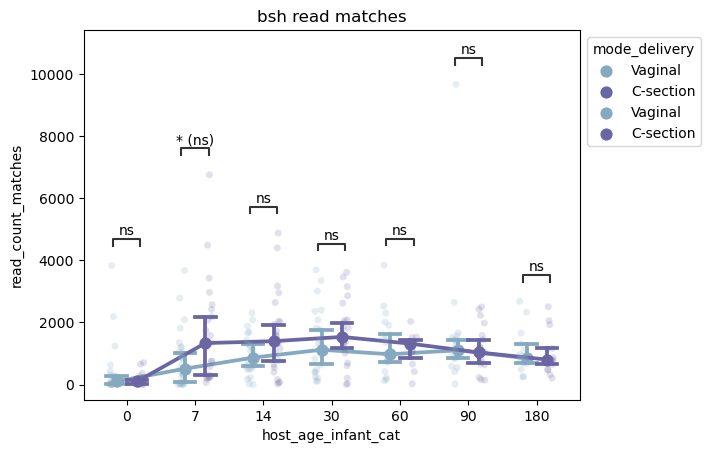

In [129]:
palette1 = ['pink', 'deeppink']
palette2 = ['#84A9C0', '#6A66A3']

g = sns.pointplot(data=bsh_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'], estimator=np.median,
                palette=palette2, capsize=.3, dodge=0.3, error_bar=('pi', 50))

g = sns.stripplot(data=bsh_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'], 
                palette=palette2, dodge=0.2, alpha=0.2)

pairs = [((tp, 'Vaginal'),(tp, 'C-section')) for tp in bsh_ifeces2['host_age_infant_cat'].unique()]
annot = Annotator(g, pairs, data=bsh_ifeces2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='inside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
#CI, 95%
plt.title("bsh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_ifeces_pointplot_dmode.svg', dpi=150, bbox_inches='tight')

In [130]:
data = bsh_ifeces2.copy()
data.dropna(subset=['read_count_matches'], inplace=True) #need to drop nans
model = smf.mixedlm("read_count_matches~host_age_infant_cat*mode_delivery", data, 
                        groups="host_subject_id", re_formula='1' )
res = model.fit(method=['lbfgs',  'powell', 'cg'])
print("LME for bsh read count matches")
print(res.summary())

LME for bsh read count matches
                            Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           read_count_matches
No. Observations:           283               Method:                       REML              
No. Groups:                 55                Scale:                        1271502.9517      
Min. group size:            4                 Log-Likelihood:               -2376.3907        
Max. group size:            7                 Converged:                    Yes               
Mean group size:            5.1                                                               
----------------------------------------------------------------------------------------------
                                               Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
----------------------------------------------------------------------------------------------
Intercept                                     12

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


In [131]:
bsh_ifeces_Bifido2

NameError: name 'bsh_ifeces_Bifido2' is not defined

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

14_Vaginal vs. 14_C-section: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:1.825e-02 U_stat=1.190e+02


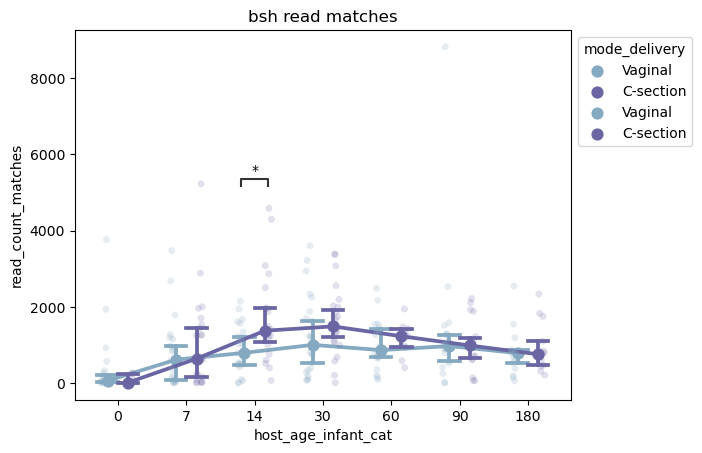

In [132]:
bsh_ifeces_Bifido = bsh_ifeces[bsh_ifeces['stitle'].str.contains('Bifidobacterium')].copy()
bsh_ifeces_Bifido2 = bsh_ifeces_Bifido[['host_age_infant_cat', 'sample_type2', 'host_subject_id', 'mode_delivery',
                               'read_count_matches']].groupby(['host_age_infant_cat', 'host_subject_id',
                                                              'sample_type2', 'mode_delivery']).sum().reset_index()
palette1 = ['pink', 'deeppink']
palette2 = ['#84A9C0', '#6A66A3']

g = sns.pointplot(data=bsh_ifeces_Bifido2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'], estimator=np.median,
                palette=palette2, capsize=.3, dodge=0.3, error_bar=('pi', 50))

g = sns.stripplot(data=bsh_ifeces_Bifido2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'], 
                palette=palette2, dodge=0.2, alpha=0.2)

#pairs = [((tp, 'Vaginal'),(tp, 'C-section')) for tp in bsh_ifeces2['host_age_infant_cat'].unique()]
pairs = [((14, 'Vaginal'),(14, 'C-section'))]
annot = Annotator(g, pairs, data=bsh_ifeces_Bifido2, x='host_age_infant_cat', y='read_count_matches',
               hue='mode_delivery', hue_order=['Vaginal', 'C-section'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='star', loc='inside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.title("bsh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh-bifido_ifeces_pointplot_dmode.svg', dpi=150, bbox_inches='tight')

In [133]:
data = bsh_ifeces_Bifido2.copy()
data.dropna(subset=['read_count_matches'], inplace=True) #need to drop nans
model = smf.mixedlm("read_count_matches~host_age_infant_cat*mode_delivery", data, 
                        groups="host_subject_id", re_formula="1")
res = model.fit(method=['lbfgs',  'powell', 'cg'])
print("LME for Bifidobacterium bsh read count matches")
print(res.summary())

LME for Bifidobacterium bsh read count matches
                            Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           read_count_matches
No. Observations:           255               Method:                       REML              
No. Groups:                 55                Scale:                        1003805.6620      
Min. group size:            2                 Log-Likelihood:               -2116.0067        
Max. group size:            7                 Converged:                    Yes               
Mean group size:            4.6                                                               
----------------------------------------------------------------------------------------------
                                               Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
----------------------------------------------------------------------------------------------
Intercept                       

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Vaginal vs. C-section: Mann-Whitney-Wilcoxon test two-sided, P_val:1.064e-02 U_stat=6.564e+03


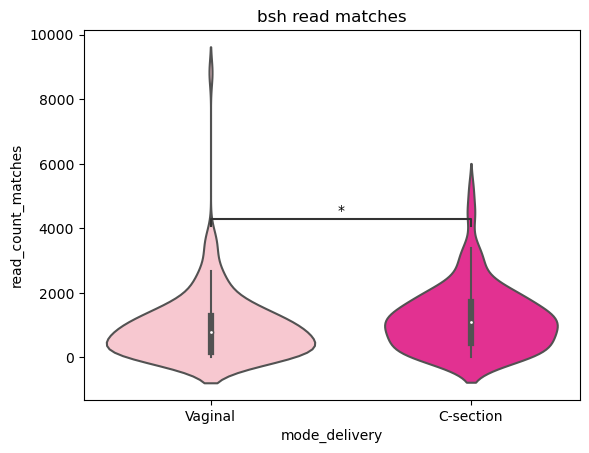

In [134]:
g = sns.violinplot(data=bsh_ifeces_Bifido2, x='mode_delivery', y='read_count_matches',
               order=['Vaginal', 'C-section'],
                palette=['pink', 'deeppink'], )

pairs = [(('Vaginal', 'C-section'))]
annot = Annotator(g, pairs, data=bsh_ifeces_Bifido2, x='mode_delivery', y='read_count_matches',
               order=['Vaginal', 'C-section'])
annot.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

plt.title("bsh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh-bifido_ifeces_pointplot_dmode.svg', dpi=150, bbox_inches='tight')

In [135]:
bsh_ifeces_short = bsh_ifeces[bsh_ifeces['host_age_infant']<46].copy()

conditions = [
    (bsh_ifeces_short['host_age_infant'] >= 0) & (bsh_ifeces_short['host_age_infant'] <= 7),   # 0 to 7 (exclusive 7)
    (bsh_ifeces_short['host_age_infant'] >= 14) & (bsh_ifeces_short['host_age_infant'] <= 28), # 14 to 28 (exclusive 28)
    (bsh_ifeces_short['host_age_infant'] >= 30) & (bsh_ifeces_short['host_age_infant'] <= 45) # 30 to 45 (inclusive 45)
]
choices = ['Category 0-7', 'Category 14-28', 'Category 30-45']

bsh_ifeces_short['metab_time_cat'] = np.select(conditions, choices, default='other')
bsh_ifeces_short.head()

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,read_count_matches,metab_time_cat
1,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_feces,Vaginal,123471,20,Category 0-7
8,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,2.0,infant_feces,Vaginal,111961,2,Category 0-7
9,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,4.0,infant_feces,C-section,115451,11,Category 0-7
10,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,4.0,infant_feces,Vaginal,102281,2,Category 0-7
15,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,7.0,infant_feces,Vaginal,123231,6,Category 0-7


In [136]:
bsh_ifeces_short2 = bsh_ifeces_short[['metab_time_cat', 'host_subject_id', 'mode_delivery',
                               'read_count_matches']].groupby(['metab_time_cat', 'mode_delivery', 'host_subject_id',]).sum().reset_index()
bsh_ifeces_short2.head()

,metab_time_cat,mode_delivery,host_subject_id,read_count_matches
0,Category 0-7,C-section,100771,263
1,Category 0-7,C-section,102681,230
2,Category 0-7,C-section,103141,1025
3,Category 0-7,C-section,103741,74
4,Category 0-7,C-section,104361,164


Category 14-28_C-section vs. Category 14-28_Vaginal: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:8.326e-02 U_stat=3.725e+02
Category 0-7_C-section vs. Category 0-7_Vaginal: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:4.527e-01 U_stat=3.790e+02
Category 30-45_C-section vs. Category 30-45_Vaginal: Mann-Whitney-Wilcoxon test two-sided with Holm-Bonferroni correction, P_val:6.297e-01 U_stat=1.590e+02


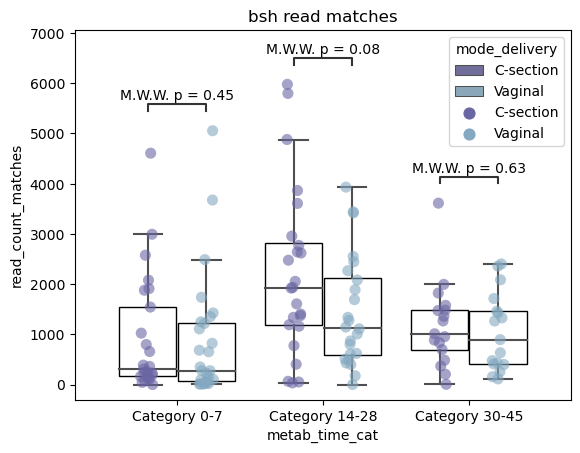

In [137]:
df = bsh_ifeces_short2[~(bsh_ifeces_short2['metab_time_cat']=='other')].copy()
pale2e = ['#6A66A3','#84A9C0']
g = sns.boxplot(data=df,
            x='metab_time_cat', y='read_count_matches', hue='mode_delivery',
            hue_order=['C-section', 'Vaginal'],
            palette=pale2e, fliersize=0, boxprops=dict(facecolor='none', edgecolor='black', linewidth=1))
g = sns.stripplot(data=df,
            x='metab_time_cat', y='read_count_matches', hue='mode_delivery',
              hue_order=['C-section', 'Vaginal'],
            palette=pale2e, alpha=0.6, dodge=True, s=8)

pairs = [((tp, 'Vaginal'),(tp, 'C-section')) for tp in ['Category 0-7', 'Category 14-28', 'Category 30-45']]
annot = Annotator(g, pairs, data=df,
            x='metab_time_cat', y='read_count_matches', hue='mode_delivery',
            hue_order=['C-section', 'Vaginal'])
annot.configure(test='Mann-Whitney', comparisons_correction="holm", text_format='simple', loc='inside', verbose=2)
annot.apply_test()
g, test_results = annot.annotate()

plt.title("bsh read matches")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_early_ifeces_boxplot_dmode.svg', dpi=150, bbox_inches='tight')

In [138]:
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

In [139]:
for cat in ['Category 14-28', 'Category 30-45']:
    cat1_df = bsh_ifeces_short2[(bsh_ifeces_short2['metab_time_cat']==cat)].copy()
    x = cat1_df[cat1_df['mode_delivery']=='Vaginal'].read_count_matches.values
    y = cat1_df[cat1_df['mode_delivery']=='C-section'].read_count_matches.values
    stat, p_value = wilcoxon(x, y,)
    print(cat)
    print("Statistic: ", stat, ";  p-value = ", p_value)
    print("______________________________________________")

Category 14-28
Statistic:  88.0 ;  p-value =  0.07872927188873291
______________________________________________
Category 30-45
Statistic:  60.5 ;  p-value =  0.4873809814453125
______________________________________________


In [140]:
for cat in ['Category 0-7', 'Category 14-28', 'Category 30-45']:
    cat1_df = bsh_ifeces_short2[(bsh_ifeces_short2['metab_time_cat']==cat)].copy()
    x = cat1_df[cat1_df['mode_delivery']=='Vaginal'].read_count_matches.values
    y = cat1_df[cat1_df['mode_delivery']=='C-section'].read_count_matches.values
    stat, p_value = mannwhitneyu(x, y,)
    print(cat)
    print("Statistic: ", stat, ";  p-value = ", p_value)
    print("______________________________________________")

Category 0-7
Statistic:  296.0 ;  p-value =  0.4526908889373473
______________________________________________
Category 14-28
Statistic:  203.5 ;  p-value =  0.08325614821317644
______________________________________________
Category 30-45
Statistic:  130.0 ;  p-value =  0.6296571659649659
______________________________________________


### Metab BA and Micro BSH - Linear Regression

In [143]:
metab = pd.read_csv('../../data/Metabolome/data_stool_bas_2.csv')
metab_bas = metab[['SampleID', 'ratio_at']].copy()
metab_bas.head()

,SampleID,ratio_at
0,100328,2.113847
1,100334,0.000000
2,101270,0.000000
3,101671,0.048096
4,102273,0.000000


In [144]:
bsh_plotting = bsh_ind_md.copy()
bsh_plotting2 = bsh_plotting[bsh_plotting['pident']>50].copy()
bsh_plotting3 = bsh_plotting2[bsh_plotting2['evalue']<0.00001].copy()
bsh_plotting4 = bsh_plotting3[bsh_plotting3['length']>40].copy()
bsh_plotting5 = bsh_plotting4[['stitle', 'host_age_infant_cat', 'host_age_infant', 'sample_type2', 'mode_delivery', 'host_subject_id', 'pident', 'tube_id']].copy()
bsh_plotting6 = bsh_plotting5.groupby(['stitle', 'host_age_infant_cat', 'host_age_infant', 'sample_type2', 'mode_delivery', 'host_subject_id', 'tube_id']).count().reset_index()
bsh_plotting6.rename(columns={'pident':'read_count_matches'}, inplace=True)
bsh_plotting6.head()

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,tube_id,read_count_matches
0,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,adult_vaginal mucus,Vaginal,117050,35020,1
1,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_feces,Vaginal,123471,23149,20
2,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_tongue,C-section,104361,26621,4
3,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_tongue,C-section,111121,37097,2
4,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_tongue,C-section,115451,37334,6


In [145]:
bsh_ifeces = bsh_plotting6[bsh_plotting6['sample_type2'].isin(['infant_feces'])].copy()
bsh_ifeces_short = bsh_ifeces[bsh_ifeces['host_age_infant']<46].copy()
bsh_ifeces_short.head()

,stitle,host_age_infant_cat,host_age_infant,sample_type2,mode_delivery,host_subject_id,tube_id,read_count_matches
1,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,1.0,infant_feces,Vaginal,123471,23149,20
8,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,0,2.0,infant_feces,Vaginal,111961,52192,2
9,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,4.0,infant_feces,C-section,115451,43943,11
10,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,4.0,infant_feces,Vaginal,102281,32821,2
15,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,7,7.0,infant_feces,Vaginal,123231,49559,6


In [146]:
bsh_ifeces_short2 = bsh_ifeces_short[['host_age_infant', 'host_subject_id', 'mode_delivery', 'tube_id',
                               'read_count_matches']].groupby(['mode_delivery', 'host_age_infant', 'host_subject_id', 'tube_id']).sum().reset_index()
bsh_ifeces_short2.head()

,mode_delivery,host_age_infant,host_subject_id,tube_id,read_count_matches
0,C-section,1.0,102681,52014,1
1,C-section,1.0,104551,49809,1
2,C-section,1.0,114591,48968,707
3,C-section,2.0,100771,52415,34
4,C-section,2.0,103141,41476,132


In [147]:
metab_bas.SampleID = metab_bas.SampleID.astype(str)

In [148]:
mm_bbsh = pd.merge(metab_bas, bsh_ifeces_short2, left_on='SampleID', right_on='tube_id')
mm_bbsh.shape

(253, 7)

In [149]:
mm_bbsh

,SampleID,ratio_at,mode_delivery,host_age_infant,host_subject_id,tube_id,read_count_matches
0,11996,0.000000,Vaginal,28.0,114341,11996,66
1,20924,0.000000,Vaginal,1.0,104281,20924,4
2,22843,0.000048,Vaginal,0.0,102911,22843,7
3,23149,0.000000,Vaginal,1.0,123471,23149,438
4,23153,0.000000,C-section,13.0,115001,23153,38
...,...,...,...,...,...,...,...
248,7441,0.000000,C-section,4.0,115001,7441,2573
249,7608,0.088712,C-section,14.0,115001,7608,34
250,7622,0.000000,Vaginal,6.0,113651,7622,8
251,76991,1.194281,C-section,35.0,114591,76991,698


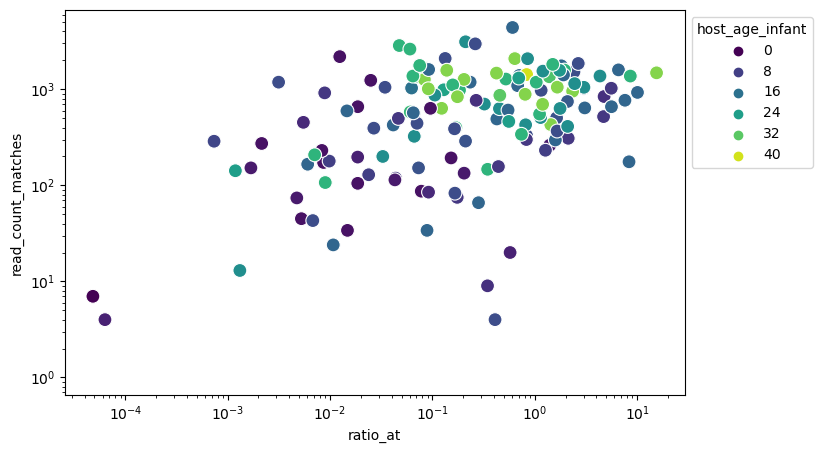

In [150]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=mm_bbsh, x='ratio_at', y='read_count_matches', 
                     hue='host_age_infant', palette='viridis', s=100)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_yscale("log")
ax.set_xscale("log")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/bsh_ratio-at_early_ifeces_scatterplot.svg', dpi=150, bbox_inches='tight')

In [151]:
mm_bbsh['read_count_matches'].dtype

dtype('int64')

In [152]:
mm_bbsh['ln_ratio_at'] = np.log(mm_bbsh['ratio_at'])
mm_bbsh['ln_ratio_at'] = mm_bbsh['ln_ratio_at'].replace([np.inf, -np.inf], np.nan)
mm_bbsh['ln_bsh_readcounts'] = np.log(mm_bbsh['read_count_matches'])
mm_bbsh['ln_bsh_readcounts'] = mm_bbsh['ln_bsh_readcounts'].replace([np.inf, -np.inf], np.nan)

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


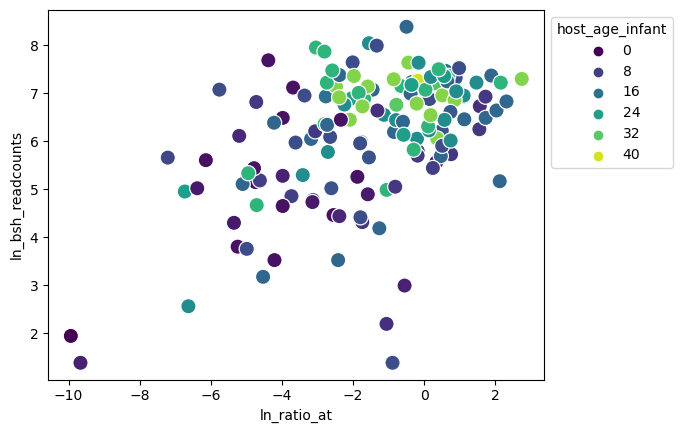

In [153]:
ax = sns.scatterplot(data=mm_bbsh, x='ln_ratio_at', y='ln_bsh_readcounts', 
                     hue='host_age_infant', palette='viridis', s=120)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_ratio-at_early_ifeces_scatterplot.svg', dpi=100, bbox_inches='tight')

In [154]:
from scipy import stats

In [158]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=mm_bbsh2['ln_ratio_at'],y=mm_bbsh2['ln_bsh_readcounts'])
p_value

1.9565770179430676e-09

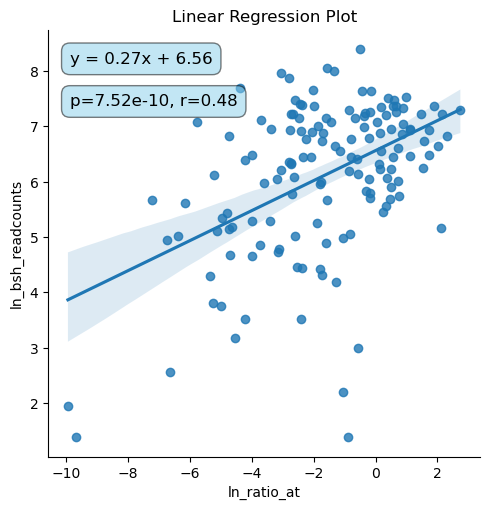

In [156]:
g = sns.lmplot(data=mm_bbsh,  x='ln_ratio_at', y='ln_bsh_readcounts')

mm_bbsh2 = mm_bbsh.dropna(subset=['ln_ratio_at', 'ln_bsh_readcounts'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x=mm_bbsh2['ln_ratio_at'],y=mm_bbsh2['ln_bsh_readcounts'])
equation_text1 = f'y = {slope:.2f}x + {intercept:.2f}'
g.ax.text(0.05, 0.95, equation_text1, transform=g.ax.transAxes, fontsize=12,
              verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='skyblue', alpha=0.5))
equation_text2 = f'p={7.52e-10}, r={r_value:.2f}'
g.ax.text(0.05, 0.85, equation_text2, transform=g.ax.transAxes, fontsize=12,
              verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='skyblue', alpha=0.5))

plt.title("Linear Regression Plot")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_ratio-at_early_ifeces_lmplot.svg', dpi=150, bbox_inches='tight')

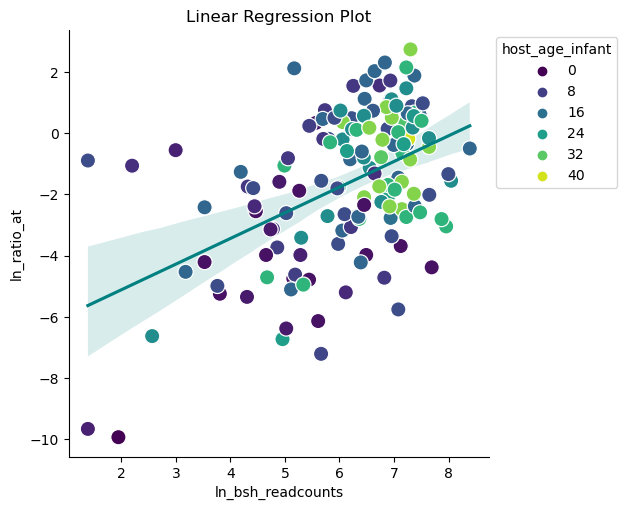

In [157]:
g = sns.lmplot(data=mm_bbsh,  y='ln_ratio_at', x='ln_bsh_readcounts', 
               scatter=False, line_kws={"color": "teal"})

ax = sns.scatterplot(data=mm_bbsh, y='ln_ratio_at', x='ln_bsh_readcounts', 
                     hue='host_age_infant', palette='viridis', s=120)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title("Linear Regression Plot")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_ratio-at_early_ifeces_lmplot_new.svg', dpi=150, bbox_inches='tight')

In [159]:
data = mm_bbsh.copy()
data.dropna(subset=['ln_ratio_at'], inplace=True) #need to drop nans
data.dropna(subset=['ln_bsh_readcounts'], inplace=True) #need to drop nans
model = smf.mixedlm("ln_bsh_readcounts~ln_ratio_at*host_age_infant", data, 
                        groups="host_subject_id", re_formula="1")
res = model.fit(method=['lbfgs',  'powell', 'cg'])
print("LME for microbe-metabolite bsh/ba interactions")
print(res.summary())

LME for microbe-metabolite bsh/ba interactions
                Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   ln_bsh_readcounts
No. Observations:    142       Method:               REML             
No. Groups:          49        Scale:                1.1866           
Min. group size:     1         Log-Likelihood:       -228.1443        
Max. group size:     7         Converged:            Yes              
Mean group size:     2.9                                              
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    5.831    0.245 23.831 0.000  5.352  6.311
ln_ratio_at                  0.248    0.067  3.717 0.000  0.117  0.378
host_age_infant              0.038    0.012  3.168 0.002  0.014  0.061
ln_ratio_at:host_age_infant -0.003    0.004 -0.

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


In [160]:
def group_to_closest_bin(number, bins):
    """
    Finds the closest value in a list of bins to a given number.

    Args:
        number (int or float): The number to group.
        bins (list): A list of numbers representing the bins.

    Returns:
        int or float: The closest bin value.
    """
    if not bins:
        return number # Return original number if bins list is empty

    # Calculate the absolute difference between the number and each bin
    differences = np.abs(np.array(bins) - number)

    # Find the index of the minimum difference
    closest_bin_index = np.argmin(differences)

    # Return the bin value at that index
    return bins[closest_bin_index]

target_bins = [2, 7, 10, 14, 21, 28, 35]
mm_bbsh['time_group'] = mm_bbsh['host_age_infant'].apply(lambda x: group_to_closest_bin(x, target_bins))

In [161]:
smm_bbsh = mm_bbsh.dropna(subset=['ln_bsh_readcounts', 'ln_ratio_at']).copy()
smm_bbsh.shape

(142, 10)

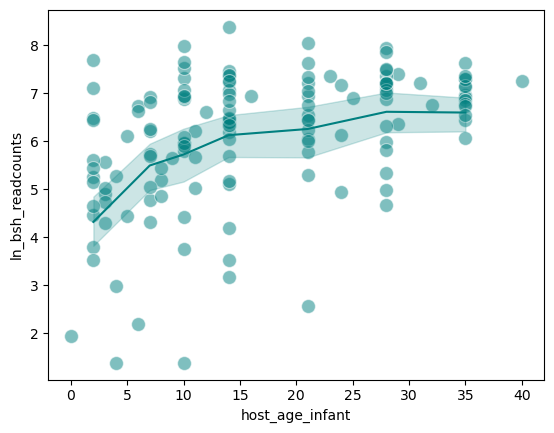

In [162]:
ax = sns.scatterplot(data=smm_bbsh, x='host_age_infant', y='ln_bsh_readcounts',
                    s=100, alpha=0.5, color='teal')
ax = sns.lineplot(data=mm_bbsh, x='time_group', y='ln_bsh_readcounts', color='teal')
#plt.savefig('../figures/bsh-ln_early_ifeces_scatterlineplot.svg', dpi=150, bbox_inches='tight')

In [164]:
data = smm_bbsh.copy()
data.dropna(subset=['ln_bsh_readcounts'], inplace=True) #need to drop nans
model = smf.mixedlm("ln_bsh_readcounts~host_age_infant", data, 
                        groups="host_subject_id", re_formula='1')
res = model.fit(method=['lbfgs',  'powell', 'cg'])
print("LME for bsh read count matches")
print(res.summary())

LME for bsh read count matches
             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ln_bsh_readcounts
No. Observations: 142     Method:             REML             
No. Groups:       49      Scale:              1.3033           
Min. group size:  1       Log-Likelihood:     -232.8649        
Max. group size:  7       Converged:          Yes              
Mean group size:  2.9                                          
---------------------------------------------------------------
                      Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             5.145    0.196 26.293 0.000  4.762  5.529
host_age_infant       0.057    0.009  6.053 0.000  0.039  0.076
host_subject_id Var   0.196    0.155                           



/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


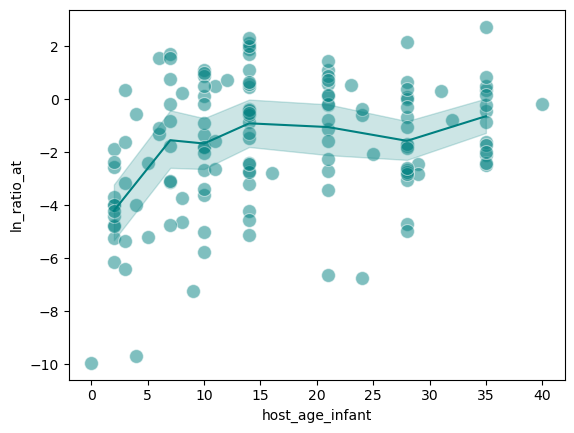

In [165]:
ax = sns.scatterplot(data=smm_bbsh, x='host_age_infant', y='ln_ratio_at',
                    s=100, alpha=0.5, color='teal')
ax = sns.lineplot(data=mm_bbsh, x='time_group', y='ln_ratio_at', color='teal')
#plt.savefig('../figures/ratio_at-ln_early_ifeces_scatterlineplot.svg', dpi=150, bbox_inches='tight')

In [166]:
data = smm_bbsh.copy()
data.dropna(subset=['ln_ratio_at'], inplace=True) #need to drop nans
model = smf.mixedlm("ln_ratio_at~host_age_infant", data, 
                        groups="host_subject_id", re_formula='1' )
res = model.fit(method=['lbfgs',  'powell', 'cg'])
print("LME for bsh read count matches")
print(res.summary())

LME for bsh read count matches
            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  ln_ratio_at
No. Observations:    142      Method:              REML       
No. Groups:          49       Scale:               4.1387     
Min. group size:     1        Log-Likelihood:      -318.9668  
Max. group size:     7        Converged:           Yes        
Mean group size:     2.9                                      
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           -2.974    0.374 -7.944 0.000 -3.708 -2.240
host_age_infant      0.074    0.017  4.268 0.000  0.040  0.107
host_subject_id Var  1.154    0.328                           



/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


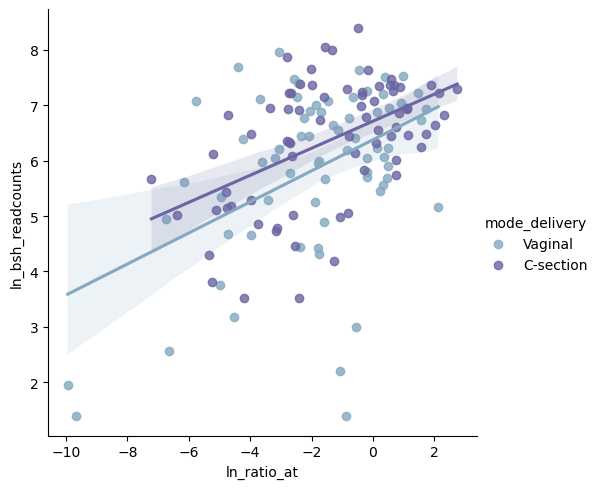

In [167]:
g = sns.lmplot(data=mm_bbsh,  x='ln_ratio_at', y='ln_bsh_readcounts',
              hue='mode_delivery', palette=palette2)

In [168]:
mm_bbsh['log10_ratio_at'] = np.log(mm_bbsh['ratio_at'])
mm_bbsh['log10_ratio_at'] = mm_bbsh['log10_ratio_at'].replace([np.inf, -np.inf], np.nan)
mm_bbsh['log10_bsh_readcounts'] = np.log(mm_bbsh['read_count_matches'])
mm_bbsh['log10_bsh_readcounts'] = mm_bbsh['log10_bsh_readcounts'].replace([np.inf, -np.inf], np.nan)

/Users/callaband/miniforge3/envs/plotting/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [171]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=mm_bbsh3['log10_ratio_at'],
                                                               y=mm_bbsh3['log10_bsh_readcounts'])
p_value

1.9565770179430676e-09

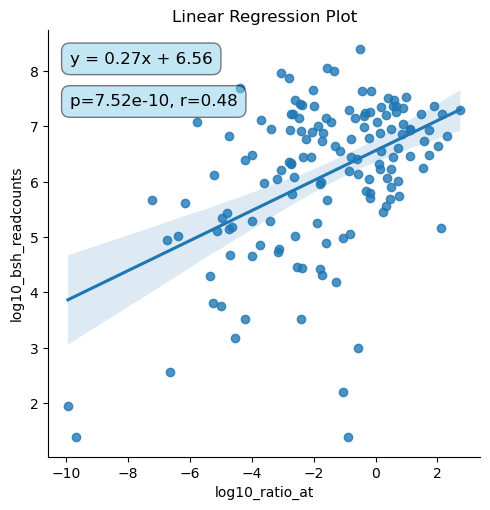

In [170]:
g = sns.lmplot(data=mm_bbsh,  x='log10_ratio_at', y='log10_bsh_readcounts')

mm_bbsh3 = mm_bbsh.dropna(subset=['log10_ratio_at', 'log10_bsh_readcounts'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x=mm_bbsh3['log10_ratio_at'],
                                                               y=mm_bbsh3['log10_bsh_readcounts'])
equation_text1 = f'y = {slope:.2f}x + {intercept:.2f}'
g.ax.text(0.05, 0.95, equation_text1, transform=g.ax.transAxes, fontsize=12,
              verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='skyblue', alpha=0.5))
equation_text2 = f'p={7.52e-10}, r={r_value:.2f}'
g.ax.text(0.05, 0.85, equation_text2, transform=g.ax.transAxes, fontsize=12,
              verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='skyblue', alpha=0.5))

plt.title("Linear Regression Plot")
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/bsh_ratio-at_early_ifeces_lmplot.svg', dpi=150, bbox_inches='tight')